In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import sklearn.model_selection as skm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
    recall_score, roc_curve, roc_auc_score, f1_score, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.inspection import permutation_importance

import warnings

warnings.filterwarnings('ignore')

https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [ ]:
weather_data = pd.read_csv('/content/drive/MyDrive/hw3_dataset/weatherAUS.csv', sep=',')

##EDA

In [ ]:
weather_data.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   
5         WNW           56.0          W  ...        55.0         23.0   
6           W           50.0         SW  ...        49.0         19.0   
7           W           35.0        SSE  ...        48.0         19.0   
8         NNW           80.0         SE  ...        42.0          9.0   
9           W           28.0          S  ...        58.0         27.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
5       1009.2       1005.4       NaN       NaN     20.6     28.9         No   
6       1009.6       1008.2       1.0       NaN     18.1     24.6         No   
7       1013.4       1010.1       NaN       NaN     16.3     25.5         No   
8       1008.9       1003.6       NaN       NaN     18.3     30.2         No   
9       1007.0       1005.7       NaN       NaN     20.1     28.2        Yes   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  
5            No  
6            No  
7            No  
8           Yes  
9            No  

[10 rows x 23 columns]

In [ ]:
weather_data.shape

(145460, 23)

In [ ]:
col_names = weather_data.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Comment


*   We have a mix of cathegorical and numerical data
*   There are some missing values in the dataset. I will explore it later.



In [ ]:
weather_data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

##Univariate Analysis

**Exploring target variable ("RainTomorrow").**

In [ ]:
weather_data['RainTomorrow'].isna().sum()

3267

In [ ]:
weather_data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [ ]:
weather_data['RainTomorrow'].value_counts()/len(weather_data)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

<Axes: xlabel='RainTomorrow', ylabel='count'>

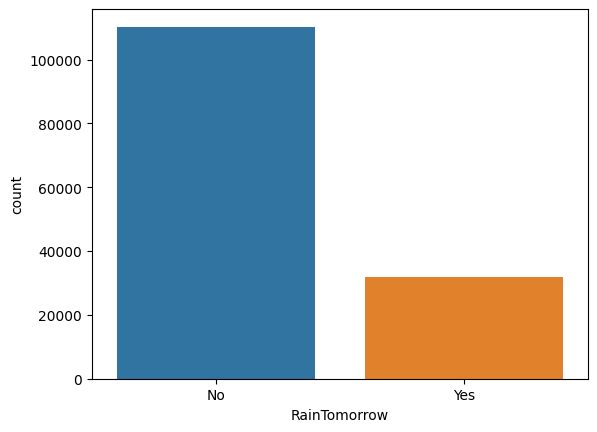

In [ ]:
sns.countplot(x= weather_data["RainTomorrow"])

**Exploring rest of variables**

In [ ]:
weather_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
(weather_data.isnull().sum()/len(weather_data))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Columns Evaporation, Sunshine, Cloud9am and Cloud3pm have high number of missing data.

##Multivariate Analysis

<Axes: >

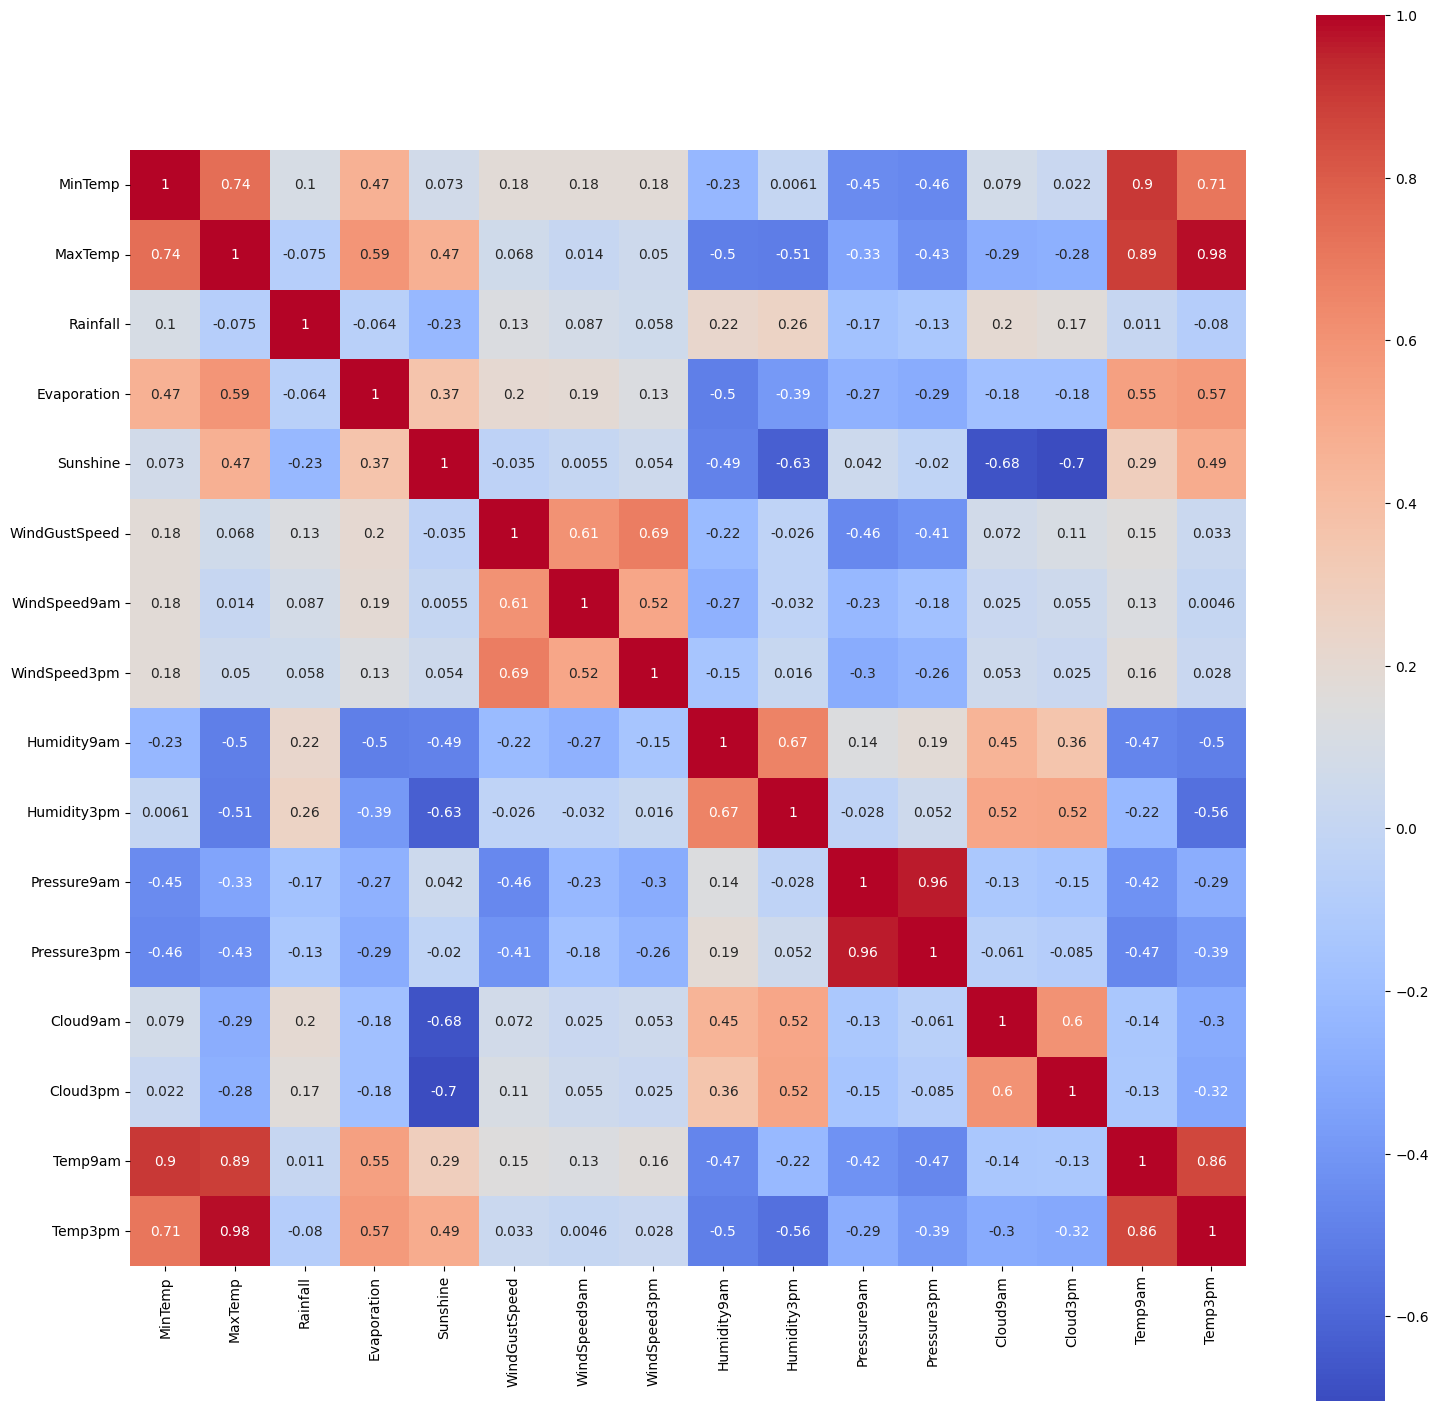

In [ ]:
# Correlation amongst numeric attributes
corrmat = weather_data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= 'coolwarm',annot=True, square=True)



*   MinTemp and Temp9am highly correlated.
*   MinTemp and Temp3pm highly correlated.
*   MaxTemp and Temp9am highly correlated.
*   MaxTemp and Temp3pm highly correlated.
*   Temp3pm and Temp9am highly correlated.
*   Humidity9am and Humidity3pm highly correlated.



#Data preparation

**Handling Na values**

I will drop rows that contain null in column "RainTomorrow" and column "RainToday".

In [ ]:
weather_data.dropna(subset=['RainTomorrow'], axis=0, inplace=True)
weather_data.dropna(subset=['RainToday'], axis=0, inplace=True)

For the numerical columns I decided to determine a threshold of 5%, if a column has less percentage of na values I will delete these rows, and if it has above 5% of na values I will impute them with mean value.

In [ ]:
for col in weather_data.select_dtypes(include=['float64']).columns:
    if weather_data[col].isnull().sum() / len(weather_data) * 100 < 5:
        weather_data.dropna(subset=[col], axis=0, inplace=True)
    else:
        weather_data[col].fillna(value=weather_data[col].mean(), inplace=True)

In [ ]:
for col in weather_data.select_dtypes(include=['object']).columns:
    weather_data[col].fillna(value=weather_data[col].mode()[0], inplace=True)

In [ ]:
weather_data.shape

(135643, 23)

In [ ]:
weather_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**Handling Date Column**

In [ ]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

In [ ]:
# extract year from date

weather_data['Year'] = weather_data['Date'].dt.year

weather_data['Year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007])

In [ ]:
# extract month from date

weather_data['Month'] = weather_data['Date'].dt.month

weather_data['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
weather_data['Day'] = weather_data['Date'].dt.day

weather_data['Day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 15, 16])

In [ ]:
# drop the original Date variable

weather_data.drop('Date', axis=1, inplace = True)

In [ ]:
weather_data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6       5.4711      7.63           W   
1   Albury      7.4     25.1       0.0       5.4711      7.63         WNW   
2   Albury     12.9     25.7       0.0       5.4711      7.63         WSW   
3   Albury      9.2     28.0       0.0       5.4711      7.63          NE   
4   Albury     17.5     32.3       1.0       5.4711      7.63           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1  8.000000  4.502108   
1           44.0        NNW        WSW  ...       1007.8  4.443493  4.502108   
2           46.0          W        WSW  ...       1008.7  4.443493  2.000000   
3           24.0         SE          E  ...       1012.8  4.443493  4.502108   
4           41.0        ENE         NW  ...       1006.0  7.000000  8.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

**Outliers**

In [ ]:
numerical = [col for col in weather_data.columns if weather_data[col].dtype!='object']

In [ ]:
weather_data[numerical].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  135643.000000  135643.000000  135643.000000  135643.000000   
mean       12.166331      23.227819       2.315974       5.462985   
std         6.378292       7.061393       8.367346       3.159813   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.600000      17.900000       0.000000       4.000000   
50%        12.000000      22.700000       0.000000       5.471100   
75%        16.800000      28.200000       0.600000       5.471100   
max        33.900000      48.100000     371.000000      82.400000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  135643.000000  135643.000000  135643.000000  135643.000000   
mean        7.637485      39.970733      14.044956      18.673835   
std         2.773152      13.246245       8.851978       8.807244   
min         0.000000       6.000000       0.000000       0.000000   
25%         7.630000      31.000000       7.000000      13.000000   
50%         7.630000      39.000000      13.000000      19.000000   
75%         8.900000      46.000000      19.000000      24.000000   
max        14.500000     135.000000      87.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  135643.000000  135643.000000  135643.000000  135643.000000   
mean       68.779517      51.389965    1017.671728    1015.281483   
std        19.107412      20.781068       6.792681       6.720277   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      36.000000    1013.500000    1011.000000   
50%        70.000000      52.000000    1017.671728    1015.281483   
75%        83.000000      66.000000    1021.900000    1019.500000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  \
count  135643.000000  135643.000000  135643.000000  135643.000000   
mean        4.443493       4.502108      16.946824      21.717986   
std         2.281967       2.135187       6.475666       6.921210   
min         0.000000       0.000000      -7.200000      -5.400000   
25%         3.000000       4.000000      12.200000      16.600000   
50%         4.443493       4.502108      16.700000      21.100000   
75%         6.000000       6.000000      21.500000      26.500000   
max         9.000000       9.000000      40.200000      46.700000   

                Year          Month            Day  
count  135643.000000  135643.000000  135643.000000  
mean     2012.723753       6.401797      15.722470  
std         2.530176       3.428179       8.800189  
min      2007.000000       1.000000       1.000000  
25%      2010.000000       3.000000       8.000000  
50%      2013.000000       6.000000      16.000000  
75%      2015.000000       9.000000      23.000000  
max      2017.000000      12.000000      31.000000

On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

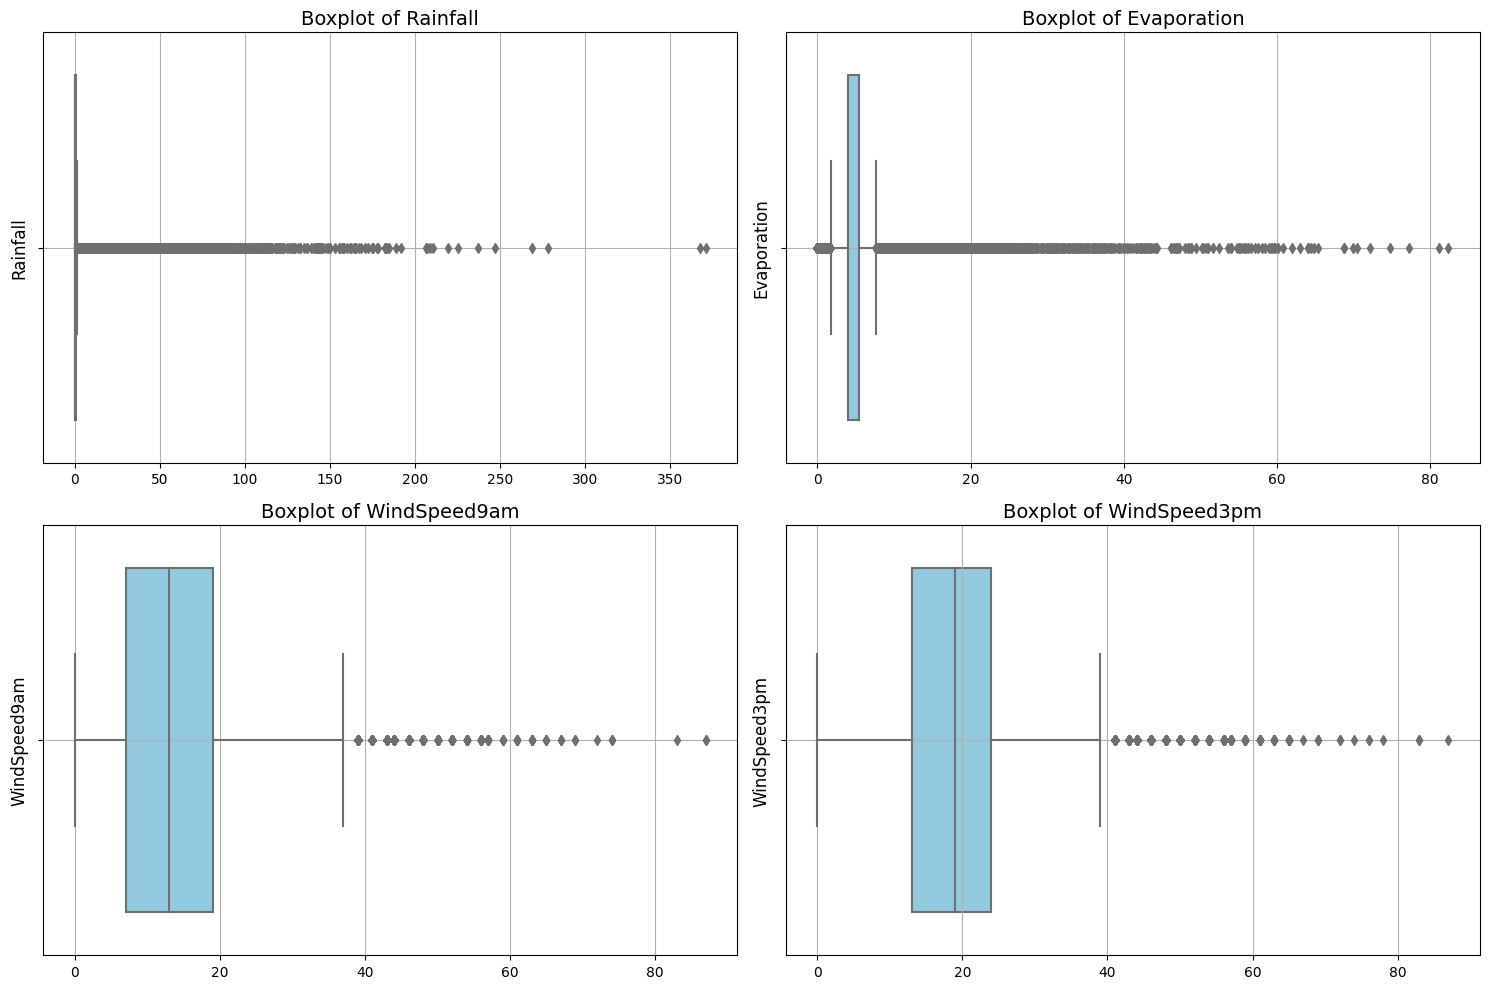

In [ ]:
columns_to_check = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=weather_data, x=column, color='skyblue')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel('')
    plt.ylabel(column, fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

Now, I will plot the histograms to check distributions to find out if they are normal or skewed.

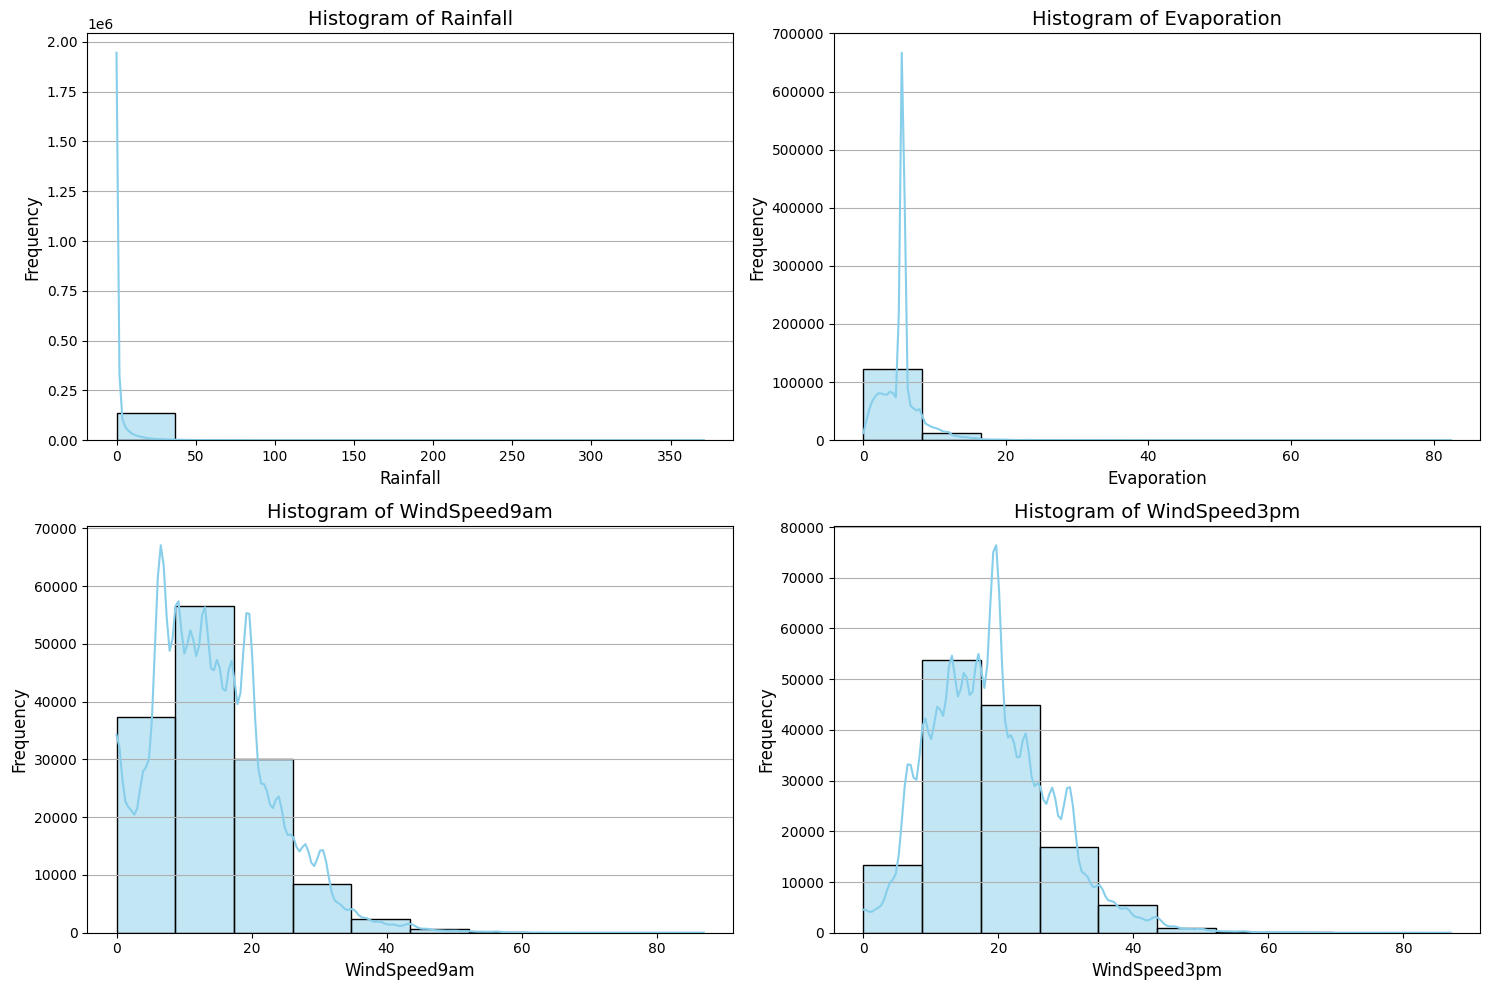

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.histplot(weather_data[column], bins=10, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [ ]:
for col in columns_to_check:
    IQR = weather_data[col].quantile(0.75) - weather_data[col].quantile(0.25)
    Lower_fence = weather_data[col].quantile(0.25) - (IQR * 3)
    Upper_fence = weather_data[col].quantile(0.75) + (IQR * 3)
    print(f'{col} outliers are values < {Lower_fence} or > {Upper_fence}')

Rainfall outliers are values < -1.7999999999999998 or > 2.4
Evaporation outliers are values < -0.4132993180470441 or > 9.884399090729392
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [ ]:
for col in columns_to_check:
    IQR = weather_data[col].quantile(0.75) - weather_data[col].quantile(0.25)
    Upper_fence = weather_data[col].quantile(0.75) + (IQR * 3)
    weather_data[col] = weather_data[col].apply(lambda x: Upper_fence if x > Upper_fence else x)

In [ ]:
weather_data[numerical].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  135643.000000  135643.000000  135643.000000  135643.000000   
mean       12.166331      23.227819       0.552688       5.225614   
std         6.378292       7.061393       0.926568       2.201671   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.600000      17.900000       0.000000       4.000000   
50%        12.000000      22.700000       0.000000       5.471100   
75%        16.800000      28.200000       0.600000       5.471100   
max        33.900000      48.100000       2.400000       9.884399   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  135643.000000  135643.000000  135643.000000  135643.000000   
mean        7.637485      39.970733      14.041344      18.669707   
std         2.773152      13.246245       8.832513       8.786486   
min         0.000000       6.000000       0.000000       0.000000   
25%         7.630000      31.000000       7.000000      13.000000   
50%         7.630000      39.000000      13.000000      19.000000   
75%         8.900000      46.000000      19.000000      24.000000   
max        14.500000     135.000000      55.000000      57.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  135643.000000  135643.000000  135643.000000  135643.000000   
mean       68.779517      51.389965    1017.671728    1015.281483   
std        19.107412      20.781068       6.792681       6.720277   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      36.000000    1013.500000    1011.000000   
50%        70.000000      52.000000    1017.671728    1015.281483   
75%        83.000000      66.000000    1021.900000    1019.500000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  \
count  135643.000000  135643.000000  135643.000000  135643.000000   
mean        4.443493       4.502108      16.946824      21.717986   
std         2.281967       2.135187       6.475666       6.921210   
min         0.000000       0.000000      -7.200000      -5.400000   
25%         3.000000       4.000000      12.200000      16.600000   
50%         4.443493       4.502108      16.700000      21.100000   
75%         6.000000       6.000000      21.500000      26.500000   
max         9.000000       9.000000      40.200000      46.700000   

                Year          Month            Day  
count  135643.000000  135643.000000  135643.000000  
mean     2012.723753       6.401797      15.722470  
std         2.530176       3.428179       8.800189  
min      2007.000000       1.000000       1.000000  
25%      2010.000000       3.000000       8.000000  
50%      2013.000000       6.000000      16.000000  
75%      2015.000000       9.000000      23.000000  
max      2017.000000      12.000000      31.000000

**Dropping highly correlated columns**

In [ ]:
weather_data = weather_data.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
weather_data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
#Defining feature vector and target variable
X = weather_data.drop(['RainTomorrow'], axis=1)

columns_before_encoding = X.columns.tolist()

y = weather_data['RainTomorrow']

In [ ]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train_encoded = pd.get_dummies(X_train, columns=['Location','RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True, sparse=False)
X_test_encoded = pd.get_dummies(X_test, columns=['Location','RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True, sparse=False)

#Standardizing the data for better performance of the models
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

#Model training

##Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_scaled, y_train)
predicted=logreg.predict(X_test_scaled)

accuracy_logreg = accuracy_score(y_test, predicted)

print (f"The accuracy of Logistic Regression is : {accuracy_logreg*100}%")

The accuracy of Logistic Regression is : 85.55420398835196%


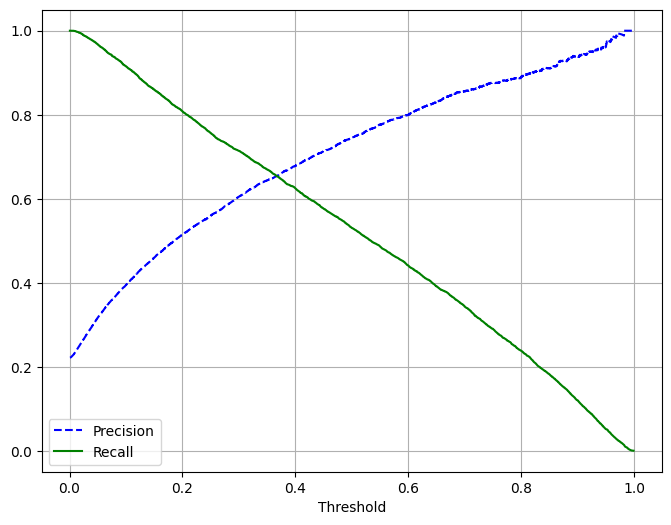

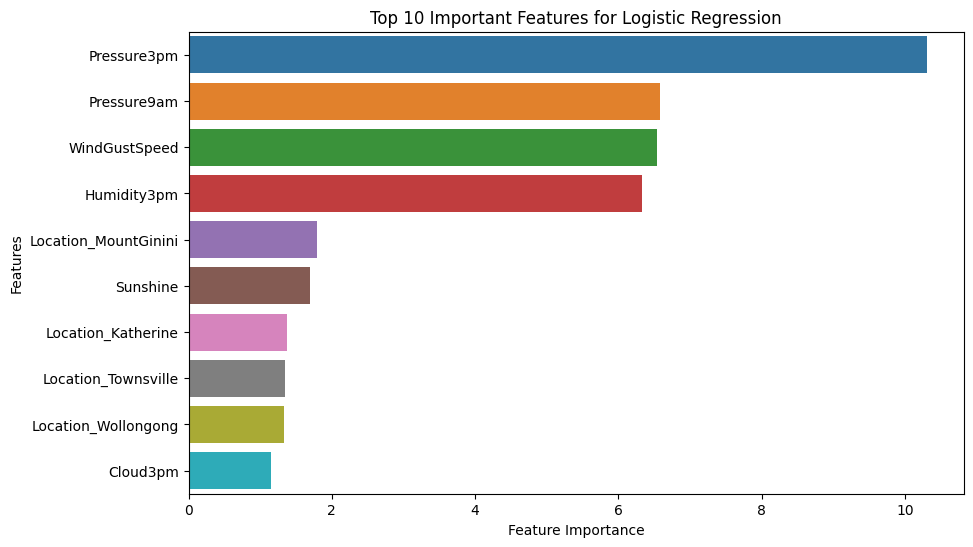

In [ ]:
y_scores = logreg.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores, pos_label='Yes')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.grid(True)
plt.show()

feature_importance = abs(logreg.coef_[0])
sorted_idx = np.argsort(feature_importance)[::-1]
top_features = X_train_encoded.columns[sorted_idx][:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx][:10], y=top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features for Logistic Regression')
plt.show()

## K-Nearest Neighbors (KNN)

In [ ]:
k_values = [3, 5, 7, 10, 15, 20]

# Dictionary to store mean cross-validation scores for each K
k_scores = {}

# Loop through each K value and perform cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring='accuracy')
    k_scores[k] = scores.mean()

# Find the K with the highest mean accuracy
best_k = max(k_scores, key=k_scores.get)
best_accuracy = k_scores[best_k]

print(f"Best K: {best_k} with accuracy: {best_accuracy}")

knn = KNeighborsClassifier(n_neighbors=best_k)

In [ ]:
knn.fit(X_train_scaled, y_train)

# Model evaluation
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"The accuracy of Knn: {accuracy_knn*100}%")

The accuracy of Knn: 81.64694607246858%


##Naive Bayes

In [ ]:
# Model training
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)

# Model evaluation
y_pred_nb = naive_bayes.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"The accuracy of Naive Bayes: {accuracy_nb*100}%")

The accuracy of Naive Bayes: 63.65512919753768%


Naive Bayes models are less sensitive to hyperparameters, and often, their default settings work well for many tasks.

##Support Vector Machines (SVM)

In [ ]:
linear_svm = LinearSVC(C=1)

kfold = skm.KFold(2,
                  random_state=0,
                  shuffle=True)

grid = skm.GridSearchCV(linear_svm,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')

grid.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

# Use the best estimator obtained from grid search
best_linear_svc = grid.best_estimator_

Best parameters: {'C': 10}
Best score: 0.8522955563337449


##Models evaluation

In [ ]:
def evaluate_model(model, X_test, y_test):
    if isinstance(model, KNeighborsClassifier):
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif isinstance(model, (LinearSVC, LogisticRegression, GaussianNB)):
        y_pred = model.predict(X_test)
        y_pred_proba = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:, 1]
    else:
        print("Invalid model type.")
        return

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

    # Plotting Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
    print('\n')

    # Accuracy, Precision, Recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes')
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
    print('\n')

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Yes')
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f'ROC-AUC: {auc:.2f}')

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    print('\n')
    # F1 Score
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    print(f'F1 Score: {f1:.2f}')
    print('\n')

    # Full classification report
    print('\nClassification Report:\n', classification_report(y_test, y_pred))

Logistic Regression Metrics:

Confusion Matrix:
[[20015  1092]
 [ 2827  3195]]



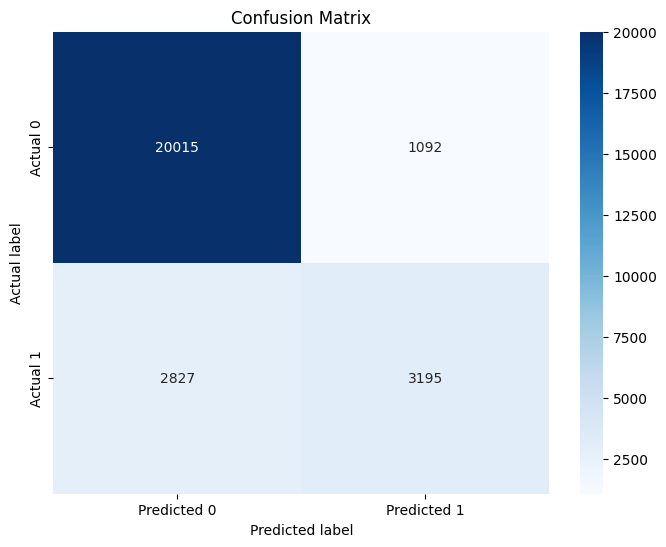



Accuracy: 0.86, Precision: 0.75, Recall: 0.53


ROC-AUC: 0.88


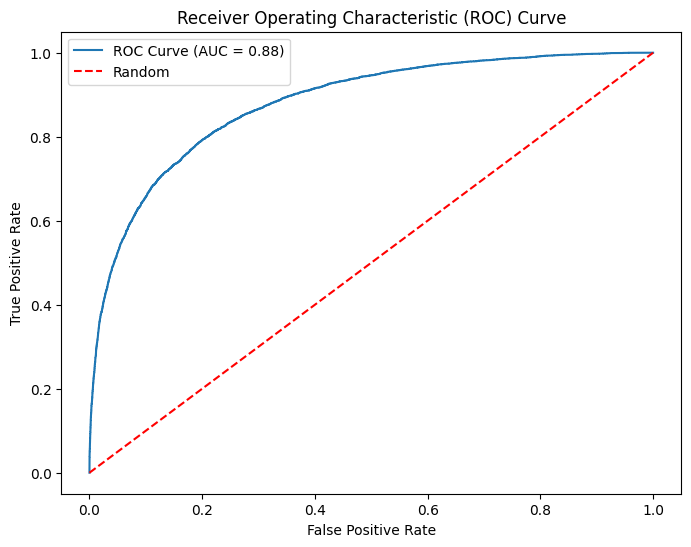



F1 Score: 0.62



Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.95      0.91     21107
         Yes       0.75      0.53      0.62      6022

    accuracy                           0.86     27129
   macro avg       0.81      0.74      0.77     27129
weighted avg       0.85      0.86      0.85     27129



In [ ]:
# Evaluate Logistic Regression
print('Logistic Regression Metrics:\n')
evaluate_model(logreg, X_test_scaled, y_test)

kNN Metrics:

Confusion Matrix:
[[20185   922]
 [ 4057  1965]]



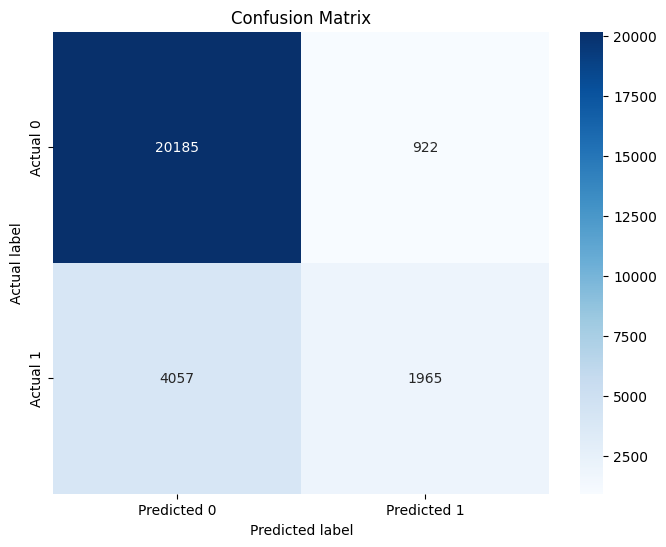



Accuracy: 0.82, Precision: 0.68, Recall: 0.33


ROC-AUC: 0.80


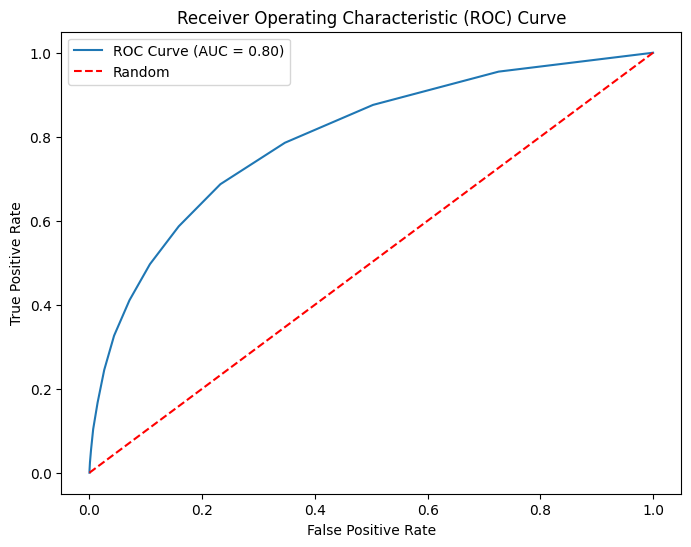



F1 Score: 0.44



Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.96      0.89     21107
         Yes       0.68      0.33      0.44      6022

    accuracy                           0.82     27129
   macro avg       0.76      0.64      0.67     27129
weighted avg       0.80      0.82      0.79     27129



In [ ]:
# Evaluate kNN
print('kNN Metrics:\n')
evaluate_model(knn, X_test_scaled, y_test)

Naive Bayes Metrics:

Confusion Matrix:
[[12960  8147]
 [ 1713  4309]]



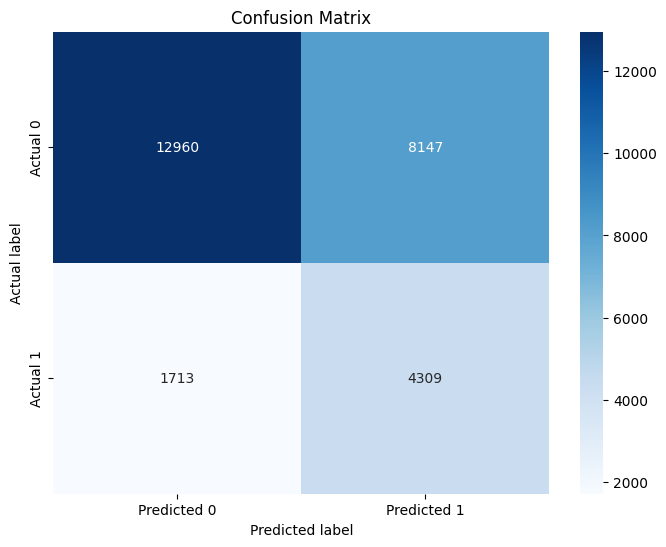



Accuracy: 0.64, Precision: 0.35, Recall: 0.72


ROC-AUC: 0.73


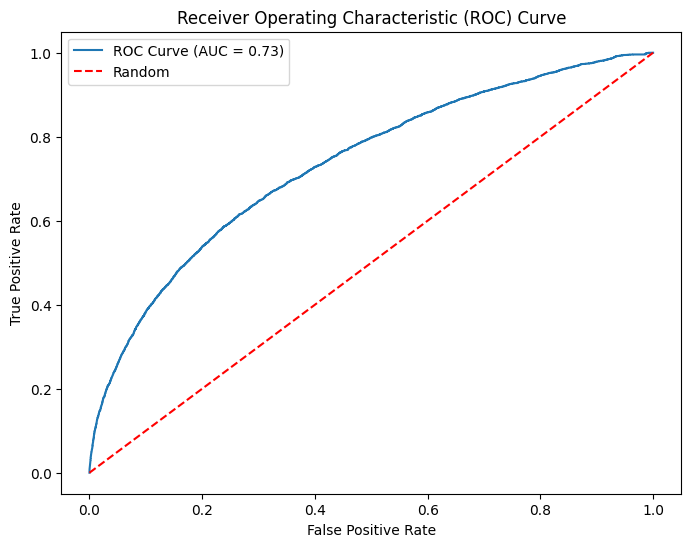



F1 Score: 0.47



Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.61      0.72     21107
         Yes       0.35      0.72      0.47      6022

    accuracy                           0.64     27129
   macro avg       0.61      0.66      0.60     27129
weighted avg       0.76      0.64      0.67     27129



In [ ]:
# Evaluate Naive Bayes
print('Naive Bayes Metrics:\n')
evaluate_model(naive_bayes, X_test_scaled, y_test)

SVM Metrics:

Confusion Matrix:
[[20132   975]
 [ 2962  3060]]



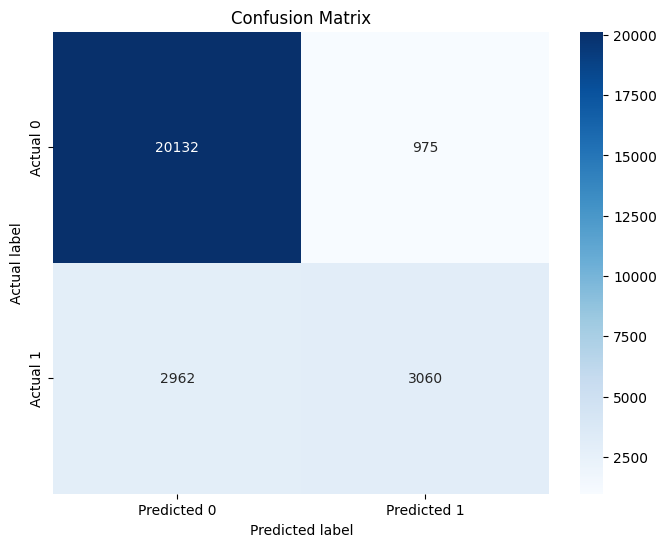



Accuracy: 0.85, Precision: 0.76, Recall: 0.51


ROC-AUC: 0.88


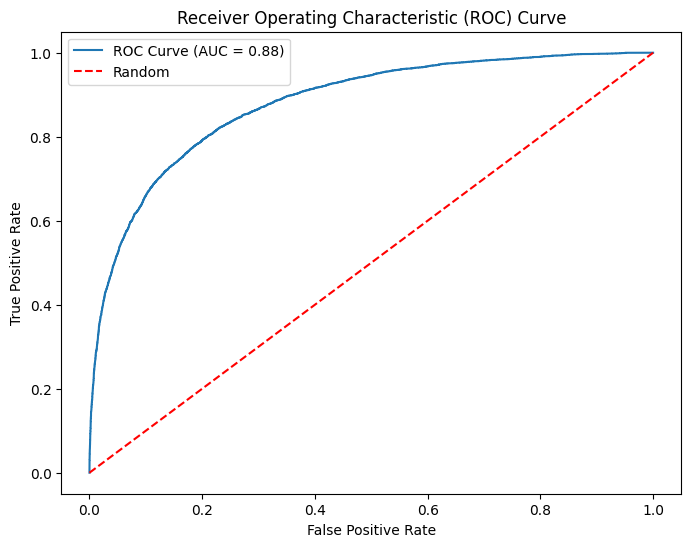



F1 Score: 0.61



Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     21107
         Yes       0.76      0.51      0.61      6022

    accuracy                           0.85     27129
   macro avg       0.82      0.73      0.76     27129
weighted avg       0.85      0.85      0.84     27129



In [ ]:
# Evaluate SVM
print('SVM Metrics:\n')
evaluate_model(best_linear_svc, X_test_scaled, y_test)

**Comparison**

In summary, Logistic Regression outperforms the other models, showcasing a more balanced performance across various metrics. KNN struggles more with recall and precision for the positive class, especially without oversampling. Naive Bayes performs decently but might need more sophisticated handling for imbalanced classes. Additionally, oversampling helps boost recall for positive instances in all models but might slightly impact precision.

##Under-sampling and Over-sampling

**Under-sampling**

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

The accuracy of Logistic Regression with under-sampling:

Confusion Matrix:
[[16932  4175]
 [ 1258  4764]]



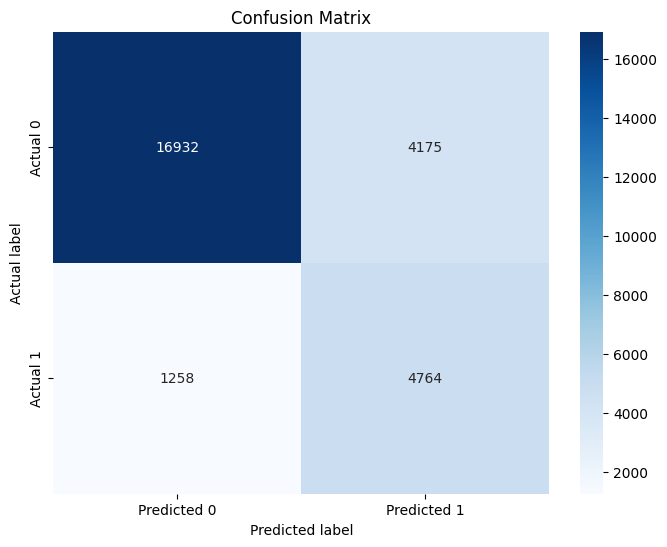



Accuracy: 0.80, Precision: 0.53, Recall: 0.79


ROC-AUC: 0.88


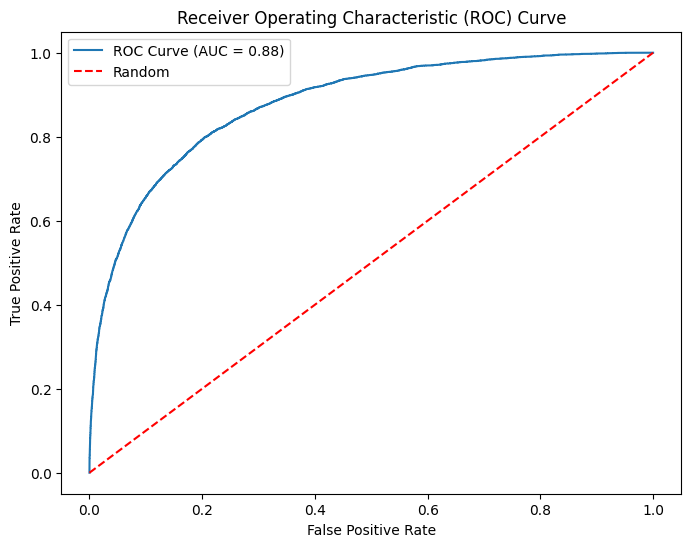



F1 Score: 0.64



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.80      0.86     21107
         Yes       0.53      0.79      0.64      6022

    accuracy                           0.80     27129
   macro avg       0.73      0.80      0.75     27129
weighted avg       0.84      0.80      0.81     27129



In [ ]:
logreg.fit(X_resampled, y_resampled)

print("The accuracy of Logistic Regression with under-sampling:\n")
evaluate_model(logreg, X_test_scaled, y_test)

The accuracy of kNN with under-sampling:

Confusion Matrix:
[[15860  5247]
 [ 1758  4264]]



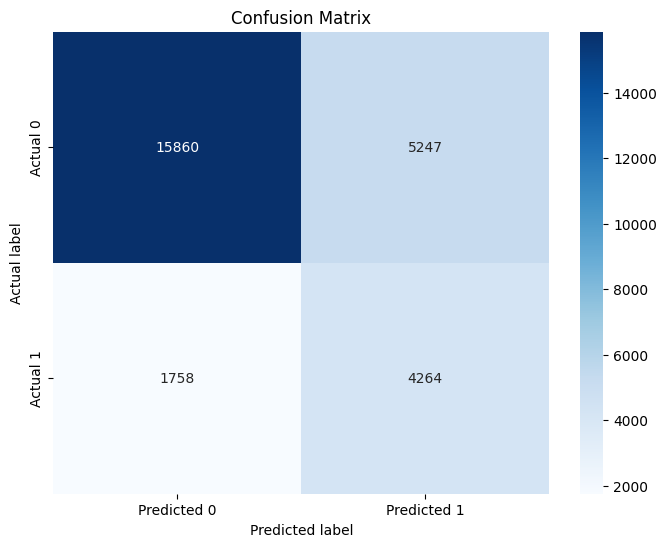



Accuracy: 0.74, Precision: 0.45, Recall: 0.71


ROC-AUC: 0.80


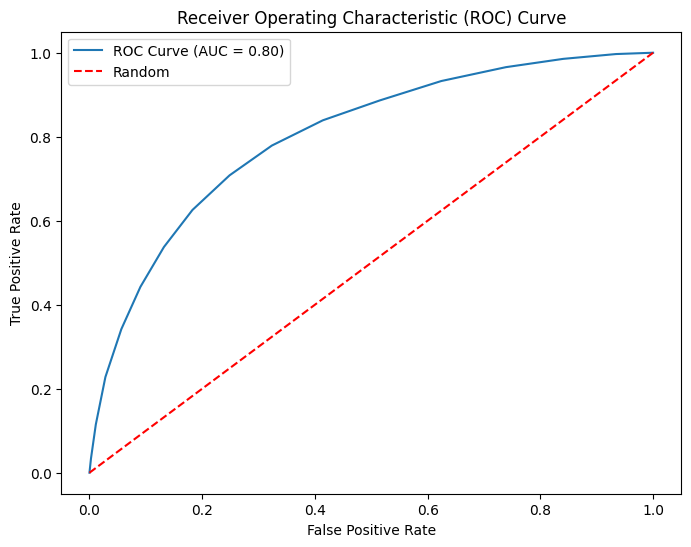



F1 Score: 0.55



Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.75      0.82     21107
         Yes       0.45      0.71      0.55      6022

    accuracy                           0.74     27129
   macro avg       0.67      0.73      0.68     27129
weighted avg       0.80      0.74      0.76     27129



In [ ]:
knn.fit(X_resampled, y_resampled)

print("The accuracy of kNN with under-sampling:\n")
evaluate_model(knn, X_test_scaled, y_test)

The accuracy of NaiveBayes with under-sampling:

Confusion Matrix:
[[12062  9045]
 [ 1517  4505]]



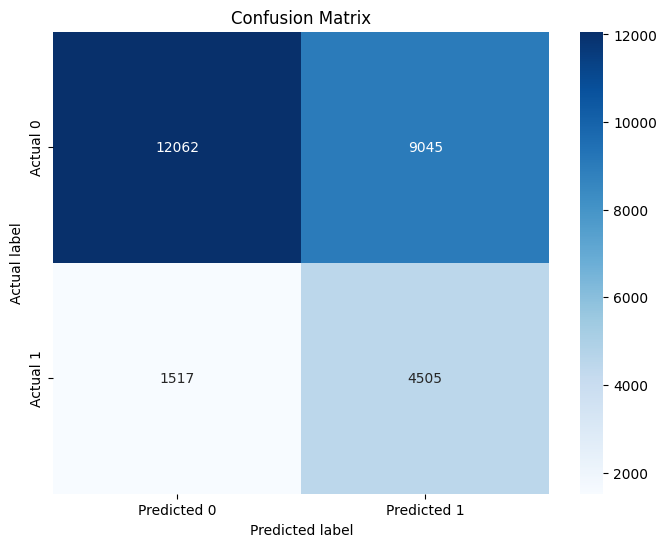



Accuracy: 0.61, Precision: 0.33, Recall: 0.75


ROC-AUC: 0.73


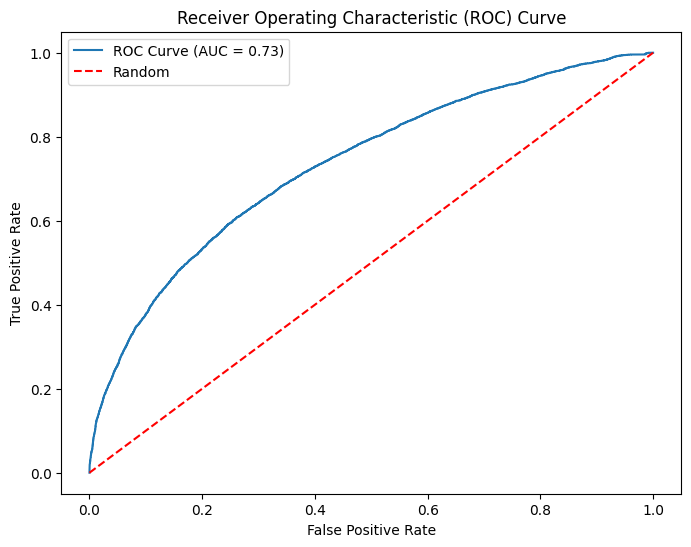



F1 Score: 0.46



Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.57      0.70     21107
         Yes       0.33      0.75      0.46      6022

    accuracy                           0.61     27129
   macro avg       0.61      0.66      0.58     27129
weighted avg       0.76      0.61      0.64     27129



In [ ]:
naive_bayes.fit(X_resampled, y_resampled)

print("The accuracy of NaiveBayes with under-sampling:\n")
evaluate_model(naive_bayes, X_test_scaled, y_test)

The accuracy of SVM with under-sampling:

Confusion Matrix:
[[17071  4036]
 [ 1310  4712]]



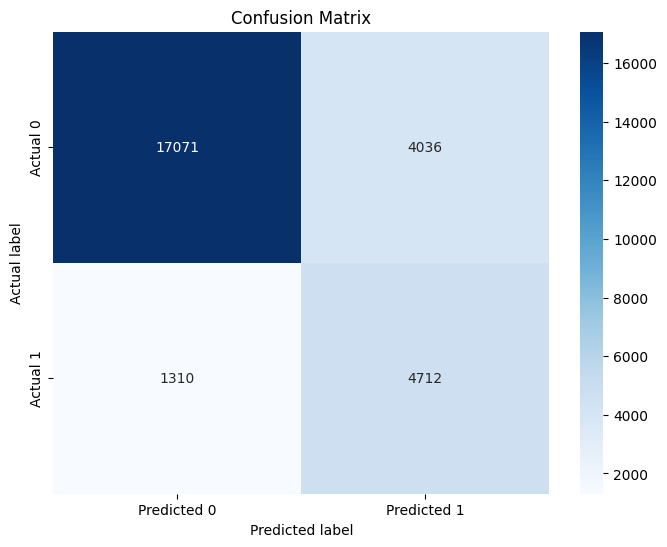



Accuracy: 0.80, Precision: 0.54, Recall: 0.78


ROC-AUC: 0.88


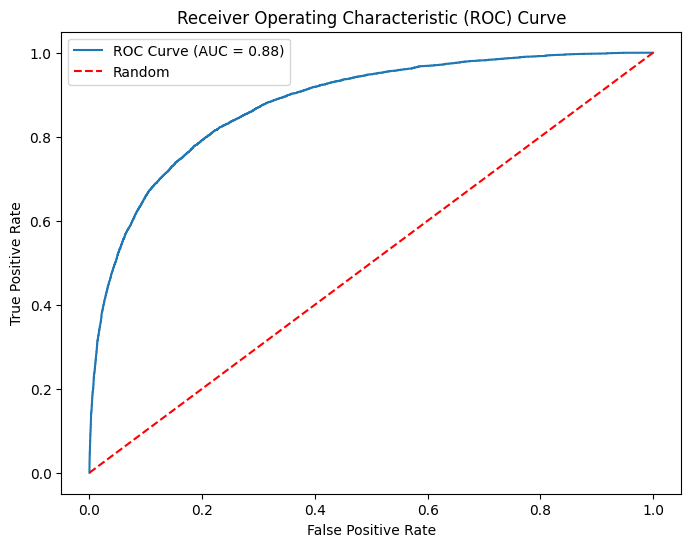



F1 Score: 0.64



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86     21107
         Yes       0.54      0.78      0.64      6022

    accuracy                           0.80     27129
   macro avg       0.73      0.80      0.75     27129
weighted avg       0.84      0.80      0.81     27129



In [ ]:
best_linear_svc.fit(X_resampled, y_resampled)

print("The accuracy of SVM with under-sampling:\n")
evaluate_model(best_linear_svc, X_test_scaled, y_test)

**Over-sampling**

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
logreg.fit(X_resampled, y_resampled)

print("The accuracy of Logistic Regression with over-sampling:\n")
evaluate_model(logreg, X_test_scaled, y_test)

The accuracy of KNN with over-sampling:

Confusion Matrix:
[[13723  7384]
 [ 1417  4605]]



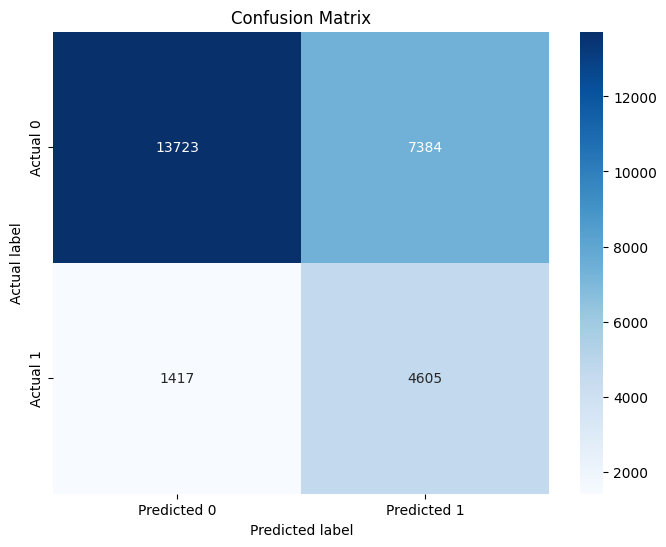



Accuracy: 0.68, Precision: 0.38, Recall: 0.76


ROC-AUC: 0.78


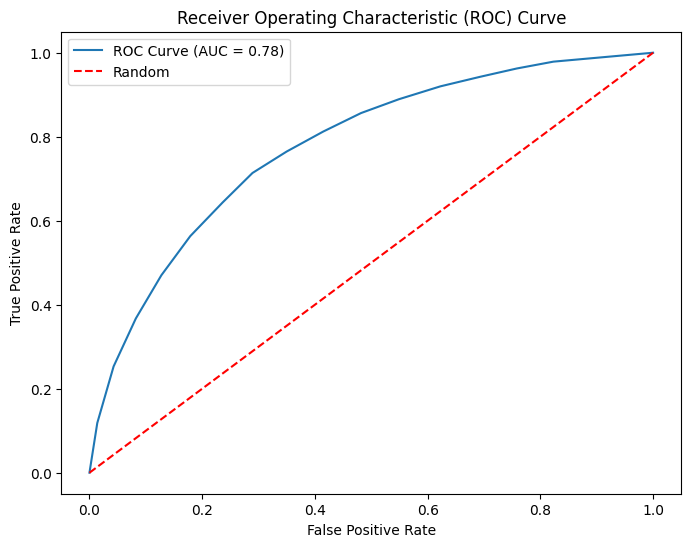



F1 Score: 0.51



Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.65      0.76     21107
         Yes       0.38      0.76      0.51      6022

    accuracy                           0.68     27129
   macro avg       0.65      0.71      0.63     27129
weighted avg       0.79      0.68      0.70     27129



In [ ]:
knn.fit(X_resampled, y_resampled)

print("The accuracy of KNN with over-sampling:\n")
evaluate_model(knn, X_test_scaled, y_test)

In [ ]:
naive_bayes.fit(X_resampled, y_resampled)

print("The accuracy of Naive Bayes with over-sampling:\n")
evaluate_model(naive_bayes, X_test_scaled, y_test)

The accuracy of SVM with over-sampling:

Confusion Matrix:
[[17185  3922]
 [ 1371  4651]]



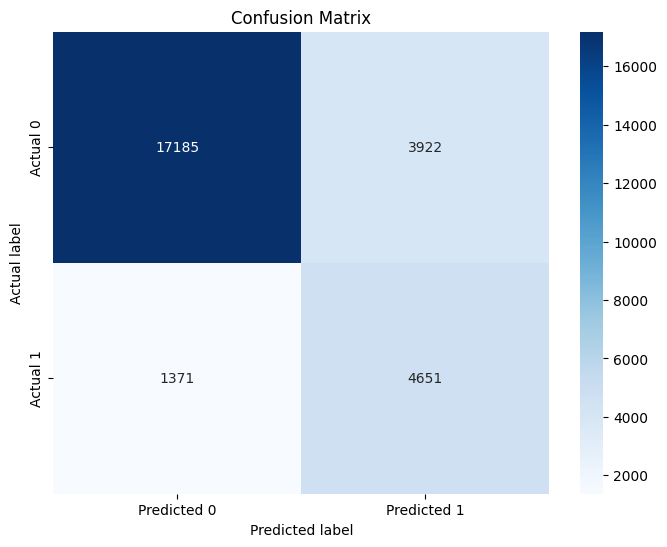



Accuracy: 0.80, Precision: 0.54, Recall: 0.77


ROC-AUC: 0.88


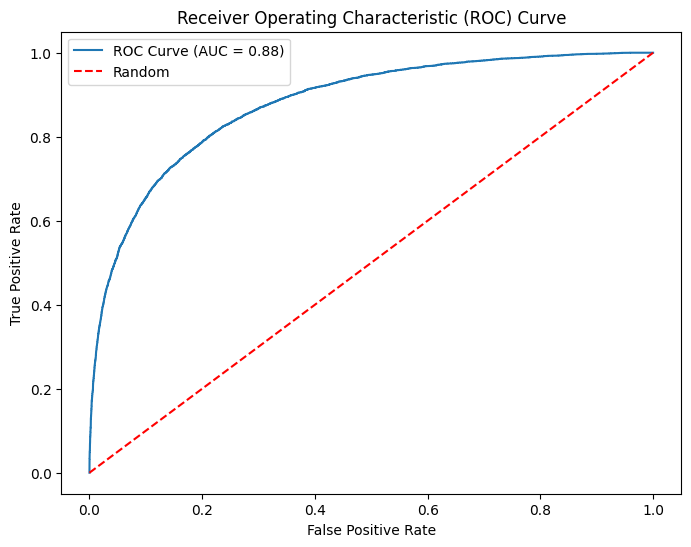



F1 Score: 0.64



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.87     21107
         Yes       0.54      0.77      0.64      6022

    accuracy                           0.80     27129
   macro avg       0.73      0.79      0.75     27129
weighted avg       0.84      0.80      0.82     27129



In [ ]:
best_linear_svc.fit(X_resampled, y_resampled)

print("The accuracy of SVM with over-sampling:\n")
evaluate_model(best_linear_svc, X_test_scaled, y_test)

###Conclusion

While the models trained on under-sampling and over-sampling demonstrate consistent performance in terms of accuracy, precision, recall, F1 score, and ROC-AUC, they seem to achieve these metrics with varying distributions in correctly predicted 'No' and 'Yes' instances. Further analysis might explore the trade-offs between correctly identifying rainy days ('Yes' class) and minimizing false positives ('No' class).

##Weighting and stratification

Metrics for unweighted LogisticRegression(max_iter=500) mode
Confusion Matrix:
[[15980   949]
 [ 2291  2483]]



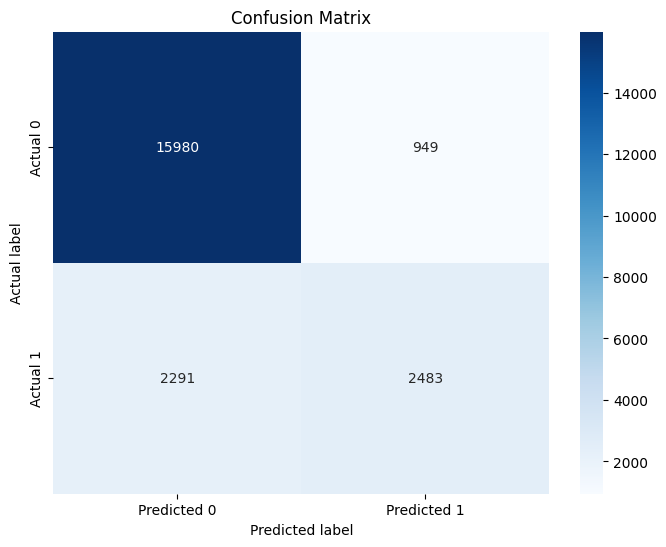



Accuracy: 0.85, Precision: 0.72, Recall: 0.52


ROC-AUC: 0.87


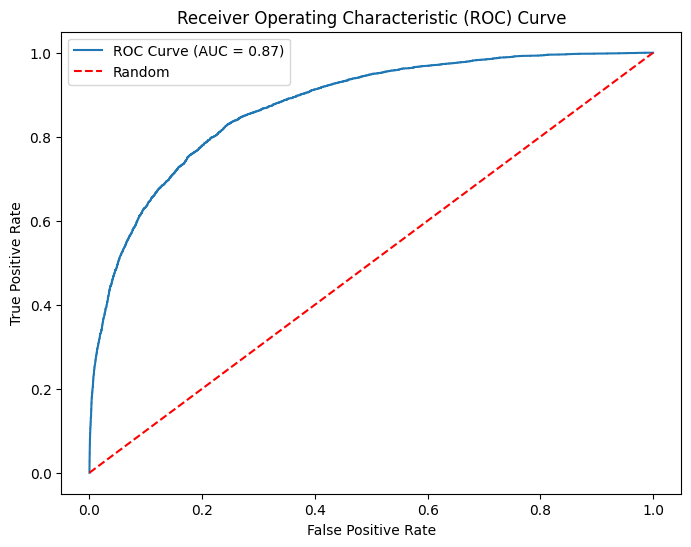



F1 Score: 0.61



Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.94      0.91     16929
         Yes       0.72      0.52      0.61      4774

    accuracy                           0.85     21703
   macro avg       0.80      0.73      0.76     21703
weighted avg       0.84      0.85      0.84     21703



Metrics weighted LogisticRegression(max_iter=500) model
Confusion Matrix:
[[13600  3329]
 [ 1074  3700]]



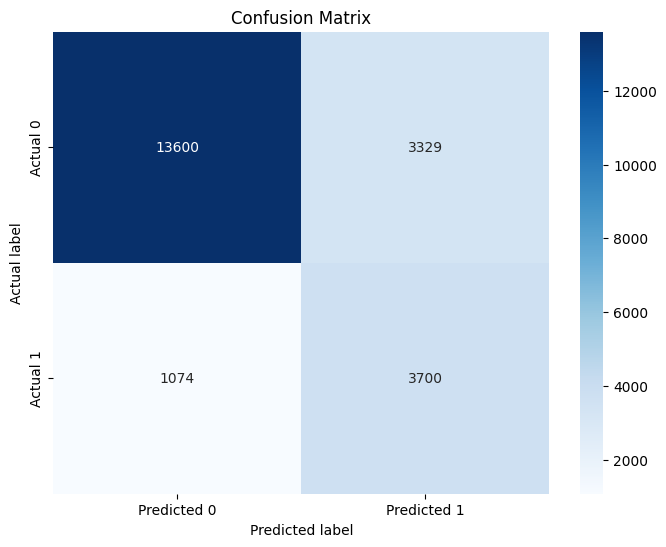



Accuracy: 0.80, Precision: 0.53, Recall: 0.78


ROC-AUC: 0.87


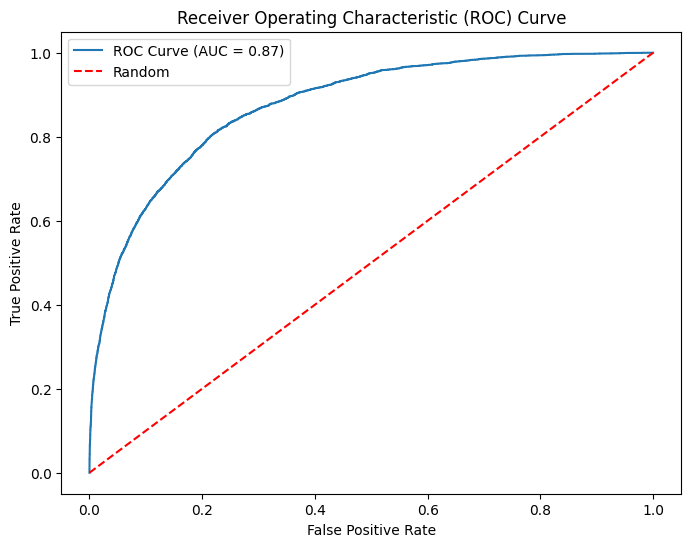



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.80      0.86     16929
         Yes       0.53      0.78      0.63      4774

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.74     21703
weighted avg       0.84      0.80      0.81     21703

Metrics for unweighted LogisticRegression(max_iter=500) mode
Confusion Matrix:
[[16084   845]
 [ 2274  2500]]



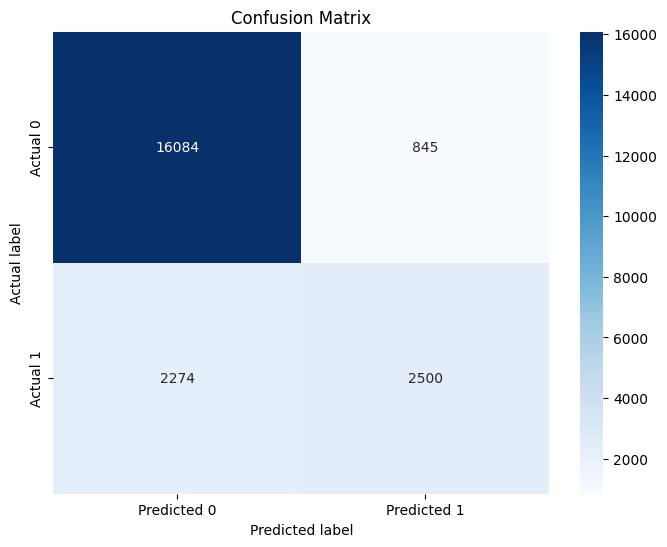



Accuracy: 0.86, Precision: 0.75, Recall: 0.52


ROC-AUC: 0.88


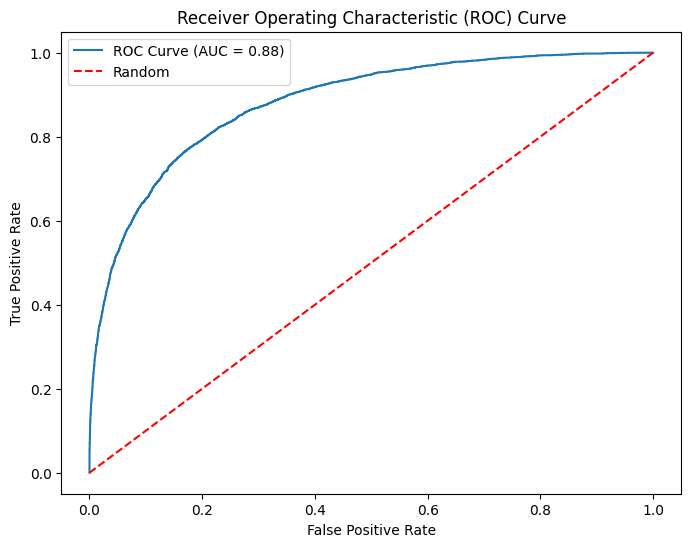



F1 Score: 0.62



Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.95      0.91     16929
         Yes       0.75      0.52      0.62      4774

    accuracy                           0.86     21703
   macro avg       0.81      0.74      0.76     21703
weighted avg       0.85      0.86      0.85     21703



Metrics weighted LogisticRegression(max_iter=500) model
Confusion Matrix:
[[13791  3138]
 [ 1043  3731]]



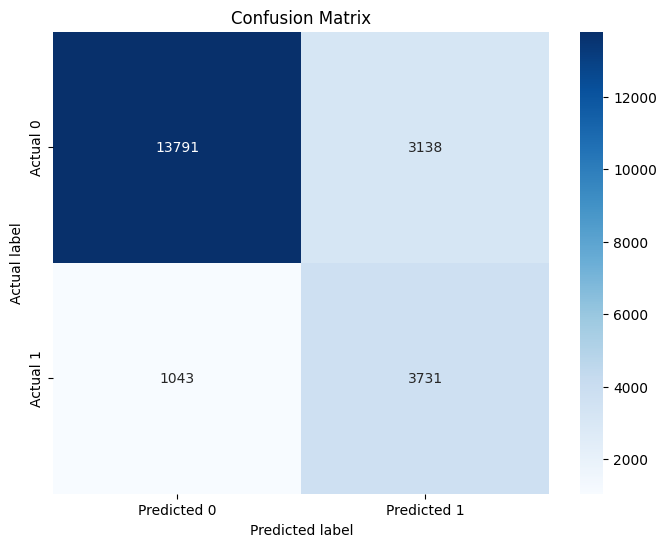



Accuracy: 0.81, Precision: 0.54, Recall: 0.78


ROC-AUC: 0.88


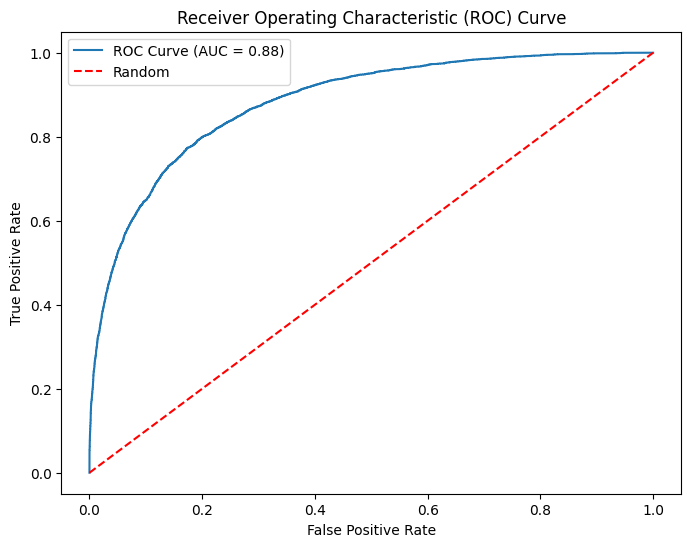



F1 Score: 0.64



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.87     16929
         Yes       0.54      0.78      0.64      4774

    accuracy                           0.81     21703
   macro avg       0.74      0.80      0.75     21703
weighted avg       0.84      0.81      0.82     21703

Metrics for unweighted LogisticRegression(max_iter=500) mode
Confusion Matrix:
[[16000   928]
 [ 2234  2541]]



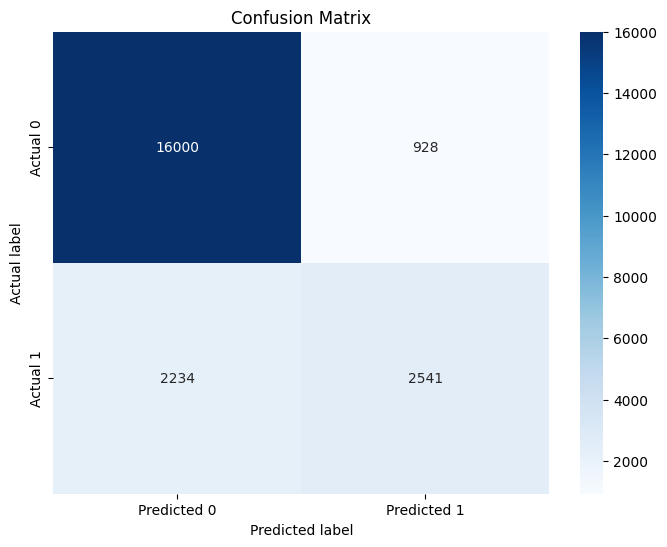



Accuracy: 0.85, Precision: 0.73, Recall: 0.53


ROC-AUC: 0.88


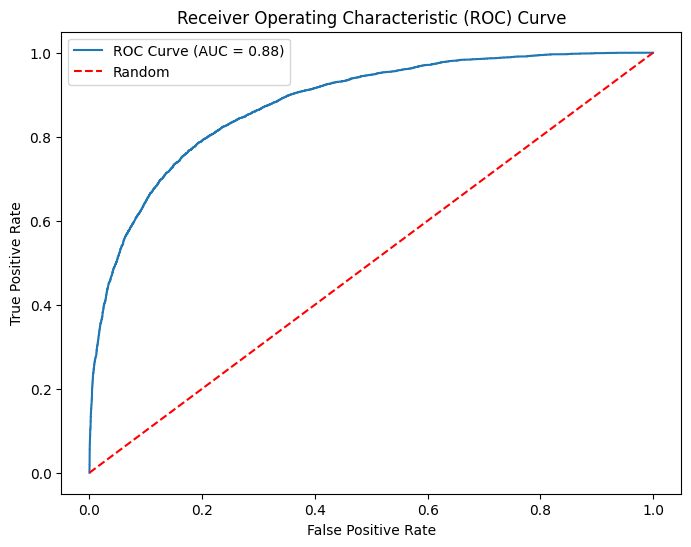



F1 Score: 0.62



Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.95      0.91     16928
         Yes       0.73      0.53      0.62      4775

    accuracy                           0.85     21703
   macro avg       0.80      0.74      0.76     21703
weighted avg       0.85      0.85      0.85     21703



Metrics weighted LogisticRegression(max_iter=500) model
Confusion Matrix:
[[13620  3308]
 [ 1029  3746]]



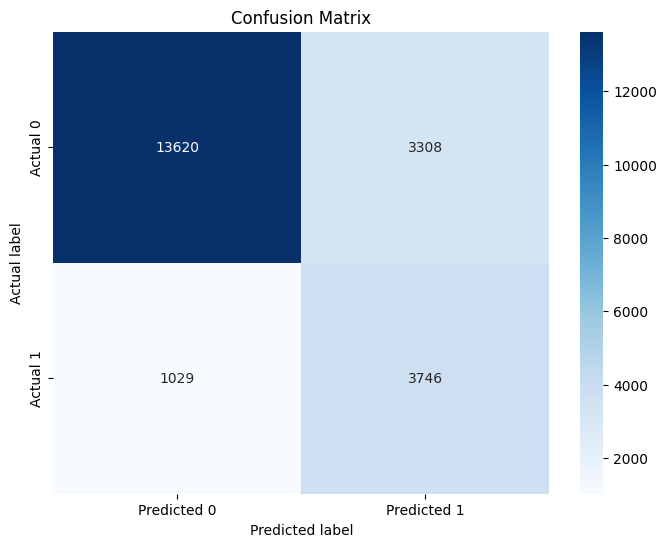



Accuracy: 0.80, Precision: 0.53, Recall: 0.78


ROC-AUC: 0.88


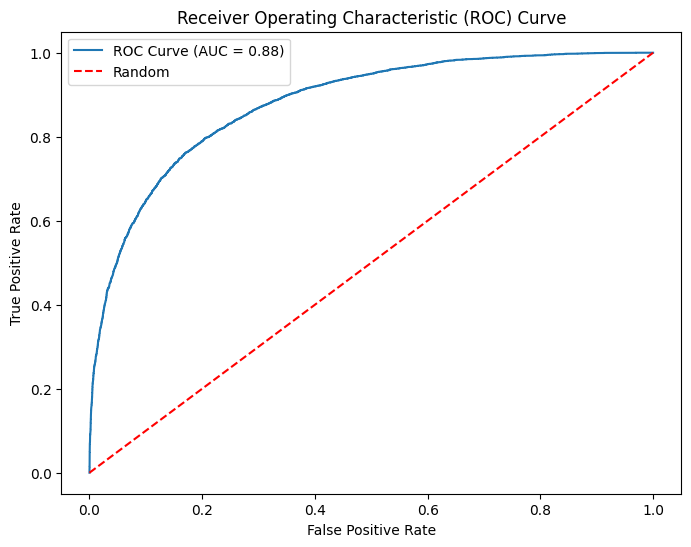



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.80      0.86     16928
         Yes       0.53      0.78      0.63      4775

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.75     21703
weighted avg       0.84      0.80      0.81     21703

Metrics for unweighted LogisticRegression(max_iter=500) mode
Confusion Matrix:
[[16030   898]
 [ 2352  2423]]



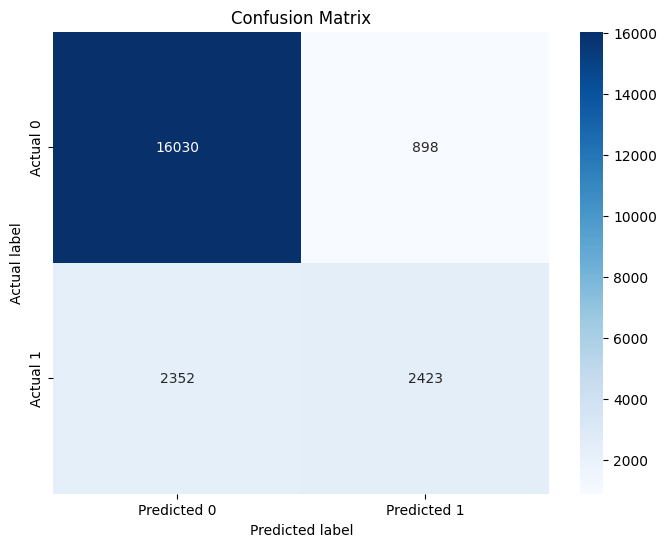



Accuracy: 0.85, Precision: 0.73, Recall: 0.51


ROC-AUC: 0.87


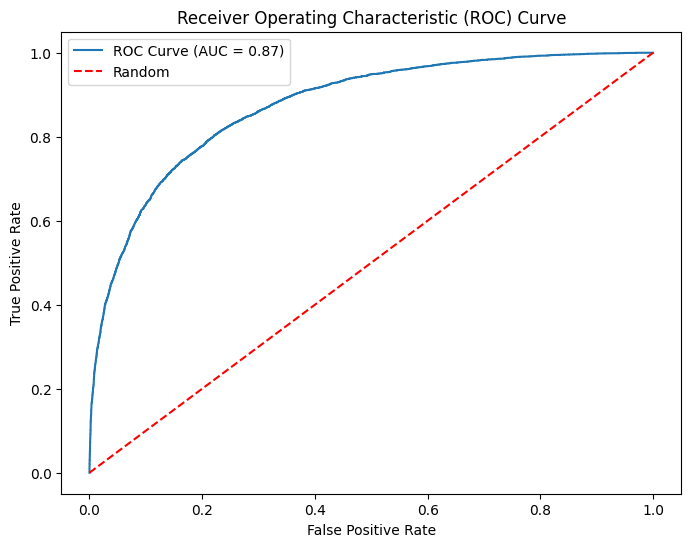



F1 Score: 0.60



Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     16928
         Yes       0.73      0.51      0.60      4775

    accuracy                           0.85     21703
   macro avg       0.80      0.73      0.75     21703
weighted avg       0.84      0.85      0.84     21703



Metrics weighted LogisticRegression(max_iter=500) model
Confusion Matrix:
[[13650  3278]
 [ 1083  3692]]



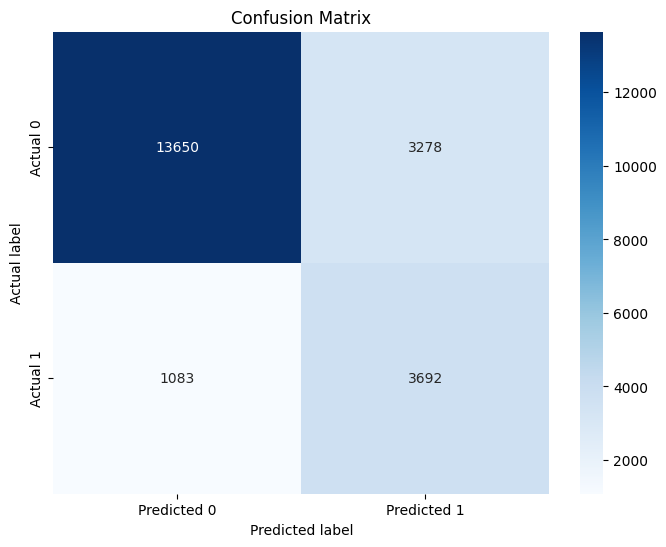



Accuracy: 0.80, Precision: 0.53, Recall: 0.77


ROC-AUC: 0.88


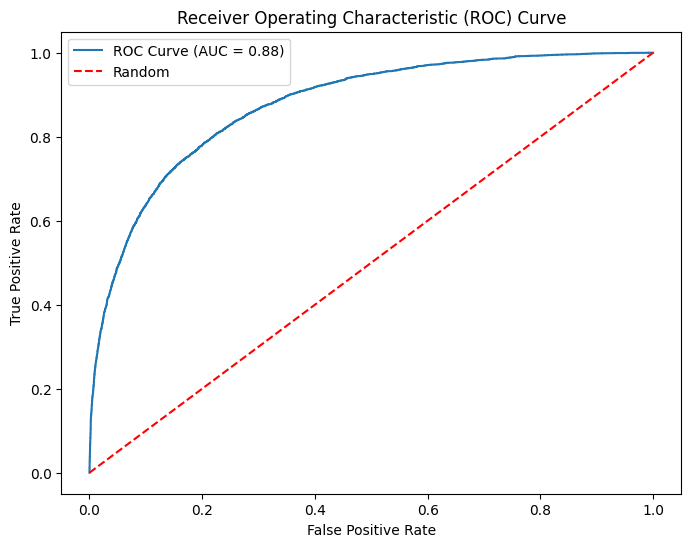



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86     16928
         Yes       0.53      0.77      0.63      4775

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.75     21703
weighted avg       0.84      0.80      0.81     21703

Metrics for unweighted LogisticRegression(max_iter=500) mode
Confusion Matrix:
[[16022   906]
 [ 2306  2468]]



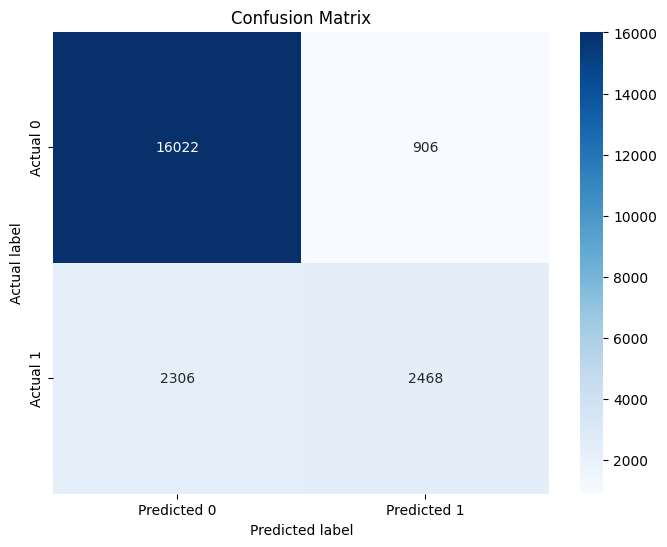



Accuracy: 0.85, Precision: 0.73, Recall: 0.52


ROC-AUC: 0.87


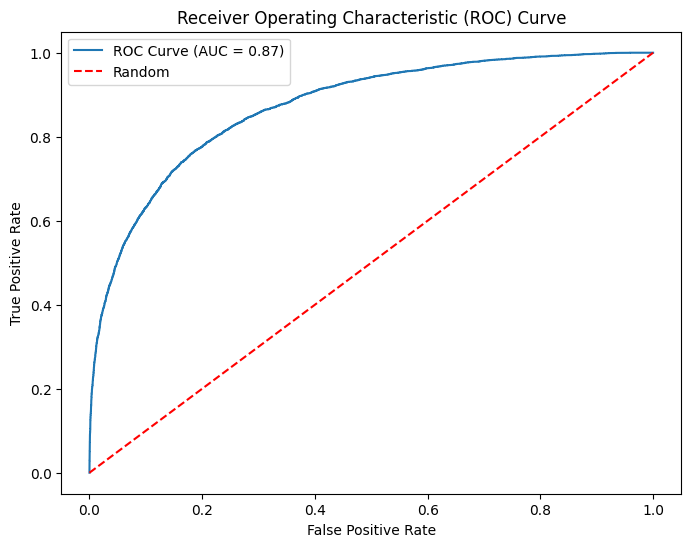



F1 Score: 0.61



Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     16928
         Yes       0.73      0.52      0.61      4774

    accuracy                           0.85     21702
   macro avg       0.80      0.73      0.76     21702
weighted avg       0.84      0.85      0.84     21702



Metrics weighted LogisticRegression(max_iter=500) model
Confusion Matrix:
[[13738  3190]
 [ 1105  3669]]



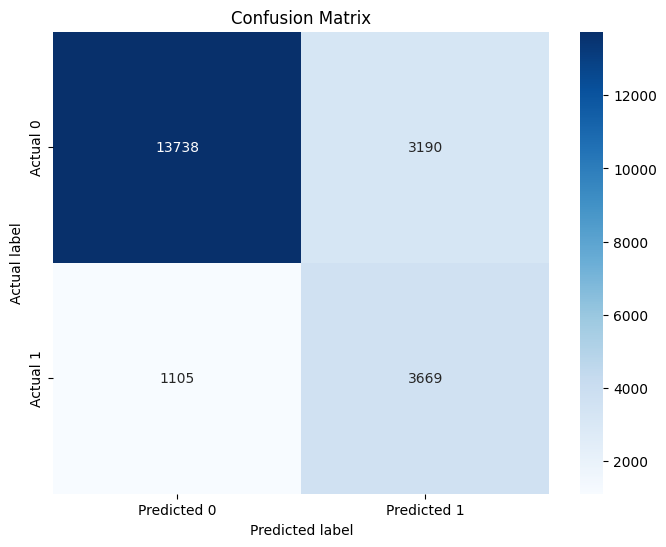



Accuracy: 0.80, Precision: 0.53, Recall: 0.77


ROC-AUC: 0.87


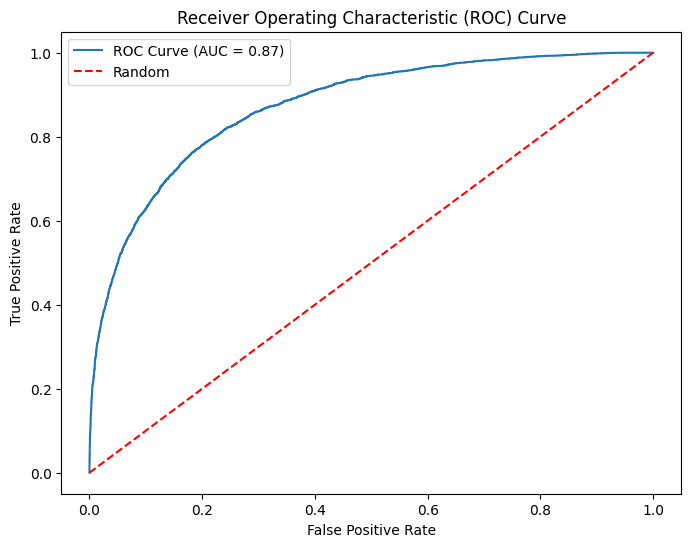



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86     16928
         Yes       0.53      0.77      0.63      4774

    accuracy                           0.80     21702
   macro avg       0.73      0.79      0.75     21702
weighted avg       0.84      0.80      0.81     21702

Metrics for unweighted KNeighborsClassifier(n_neighbors=15) mode
Confusion Matrix:
[[16111   818]
 [ 3298  1476]]



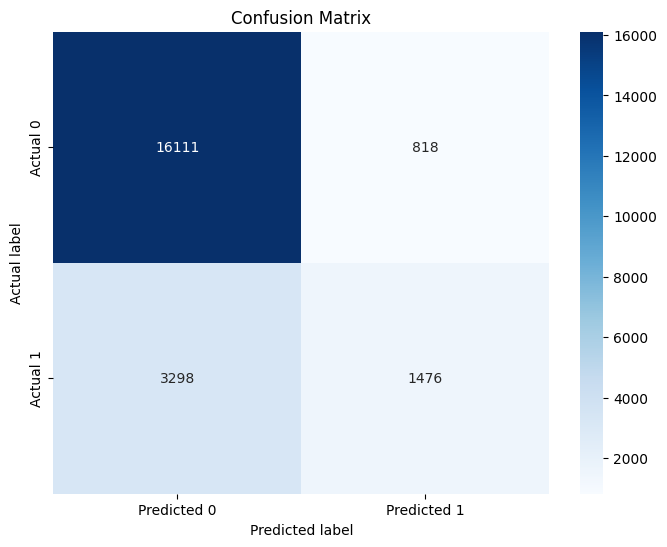



Accuracy: 0.81, Precision: 0.64, Recall: 0.31


ROC-AUC: 0.79


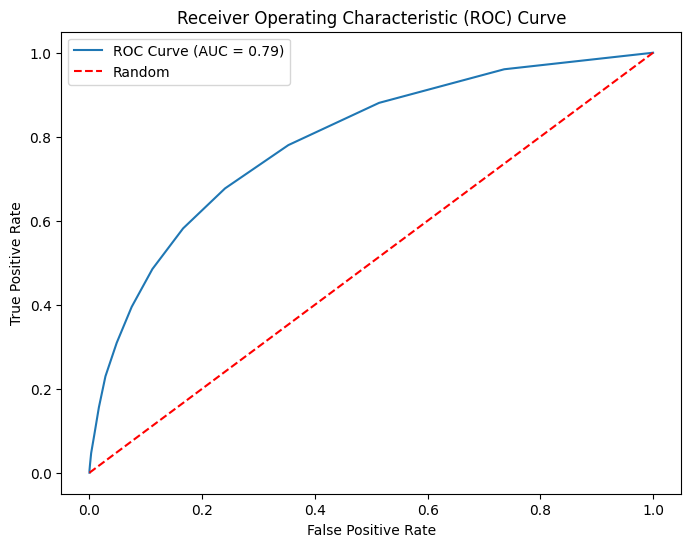



F1 Score: 0.42



Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.95      0.89     16929
         Yes       0.64      0.31      0.42      4774

    accuracy                           0.81     21703
   macro avg       0.74      0.63      0.65     21703
weighted avg       0.79      0.81      0.78     21703



Metrics weighted KNeighborsClassifier(n_neighbors=15) model
Confusion Matrix:
[[13600  3329]
 [ 1074  3700]]



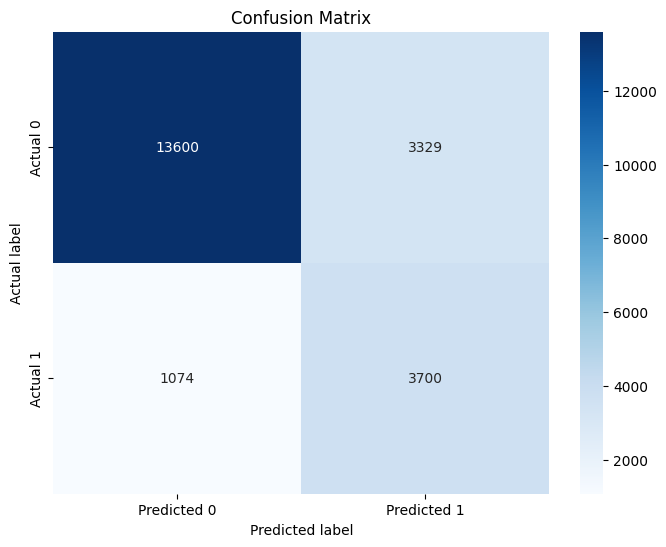



Accuracy: 0.80, Precision: 0.53, Recall: 0.78


ROC-AUC: 0.87


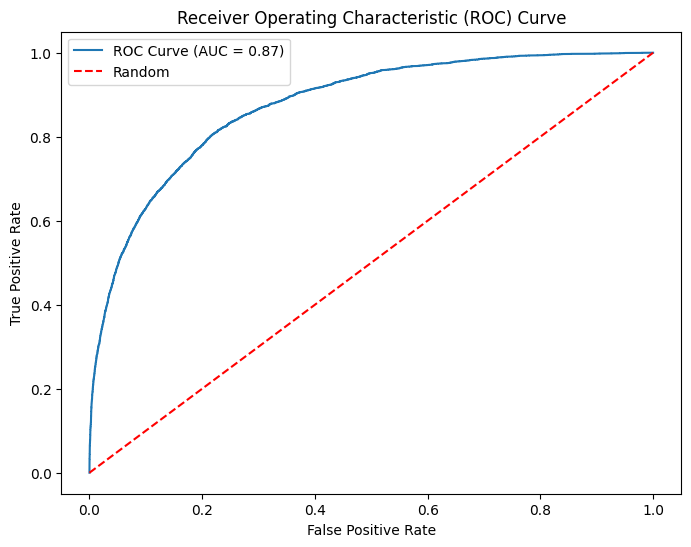



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.80      0.86     16929
         Yes       0.53      0.78      0.63      4774

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.74     21703
weighted avg       0.84      0.80      0.81     21703

Metrics for unweighted KNeighborsClassifier(n_neighbors=15) mode
Confusion Matrix:
[[16163   766]
 [ 3293  1481]]



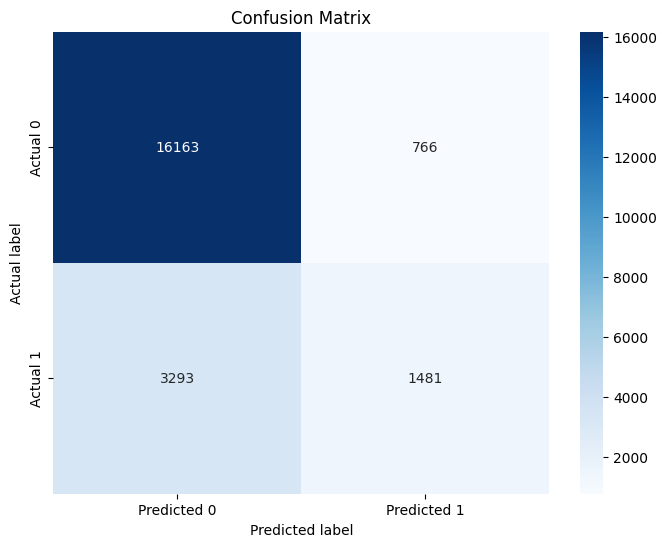



Accuracy: 0.81, Precision: 0.66, Recall: 0.31


ROC-AUC: 0.80


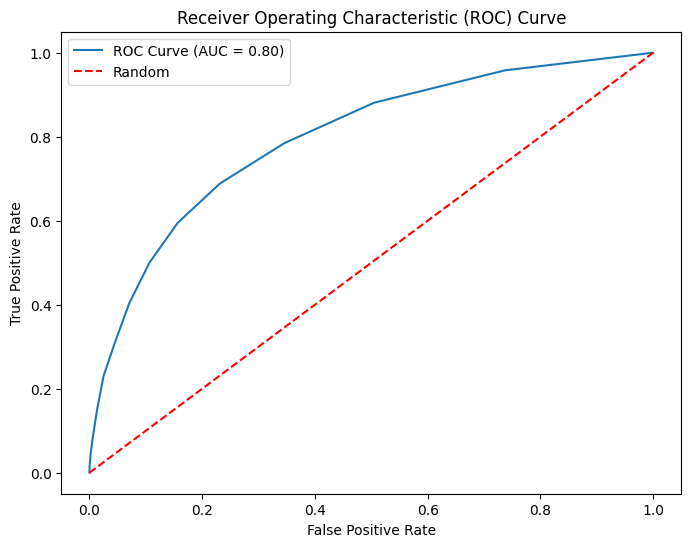



F1 Score: 0.42



Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.95      0.89     16929
         Yes       0.66      0.31      0.42      4774

    accuracy                           0.81     21703
   macro avg       0.74      0.63      0.66     21703
weighted avg       0.79      0.81      0.79     21703



Metrics weighted KNeighborsClassifier(n_neighbors=15) model
Confusion Matrix:
[[13791  3138]
 [ 1043  3731]]



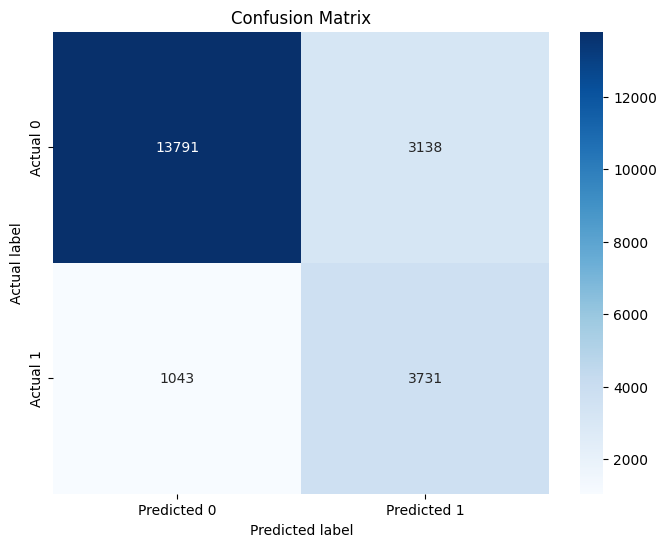



Accuracy: 0.81, Precision: 0.54, Recall: 0.78


ROC-AUC: 0.88


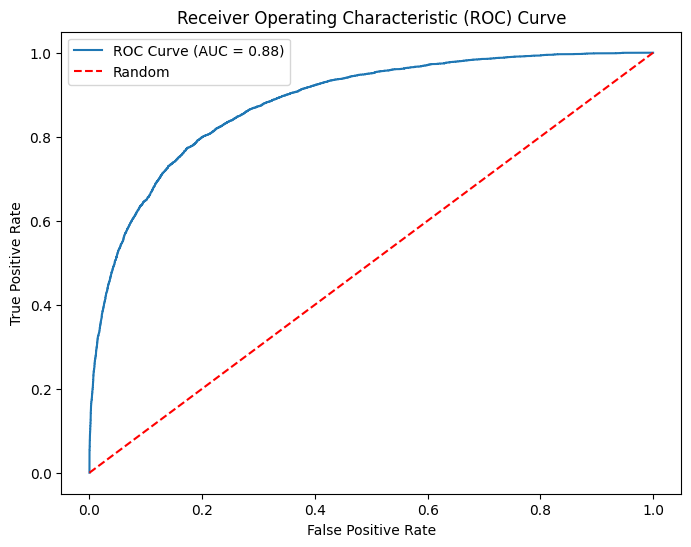



F1 Score: 0.64



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.87     16929
         Yes       0.54      0.78      0.64      4774

    accuracy                           0.81     21703
   macro avg       0.74      0.80      0.75     21703
weighted avg       0.84      0.81      0.82     21703

Metrics for unweighted KNeighborsClassifier(n_neighbors=15) mode
Confusion Matrix:
[[16176   752]
 [ 3214  1561]]



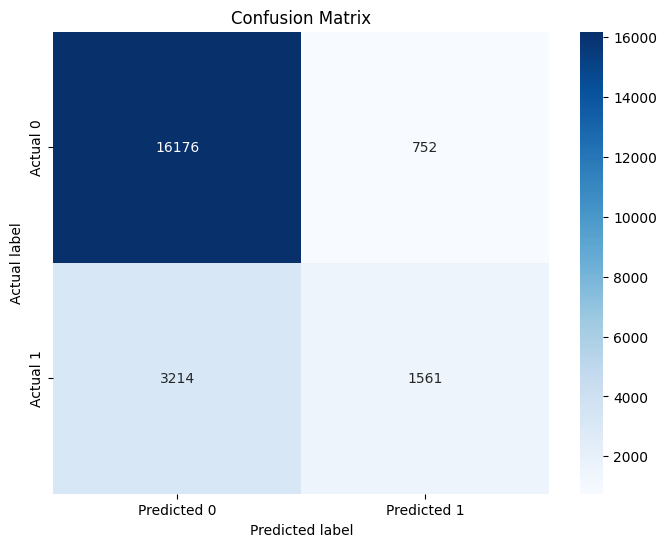



Accuracy: 0.82, Precision: 0.67, Recall: 0.33


ROC-AUC: 0.80


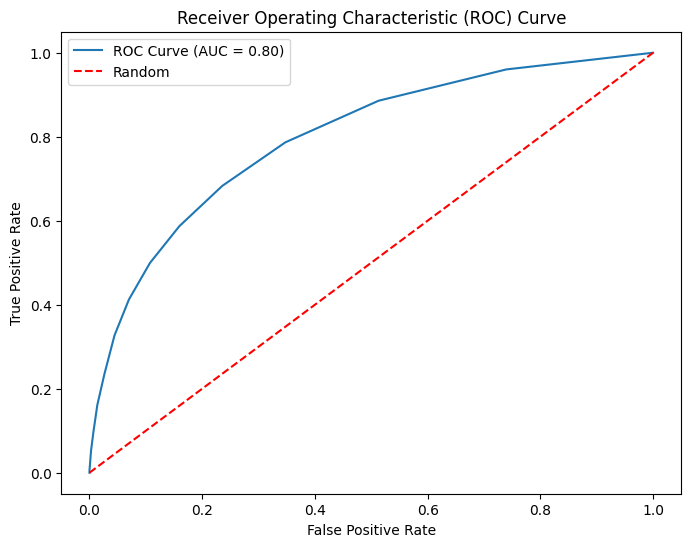



F1 Score: 0.44



Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.96      0.89     16928
         Yes       0.67      0.33      0.44      4775

    accuracy                           0.82     21703
   macro avg       0.75      0.64      0.67     21703
weighted avg       0.80      0.82      0.79     21703



Metrics weighted KNeighborsClassifier(n_neighbors=15) model
Confusion Matrix:
[[13620  3308]
 [ 1029  3746]]



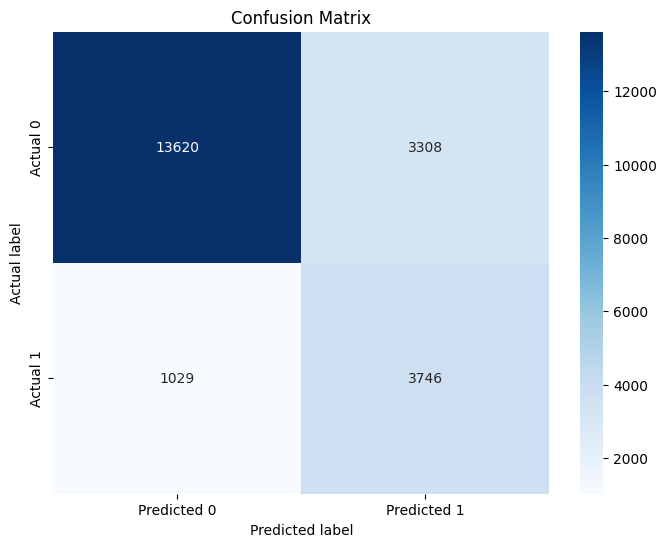



Accuracy: 0.80, Precision: 0.53, Recall: 0.78


ROC-AUC: 0.88


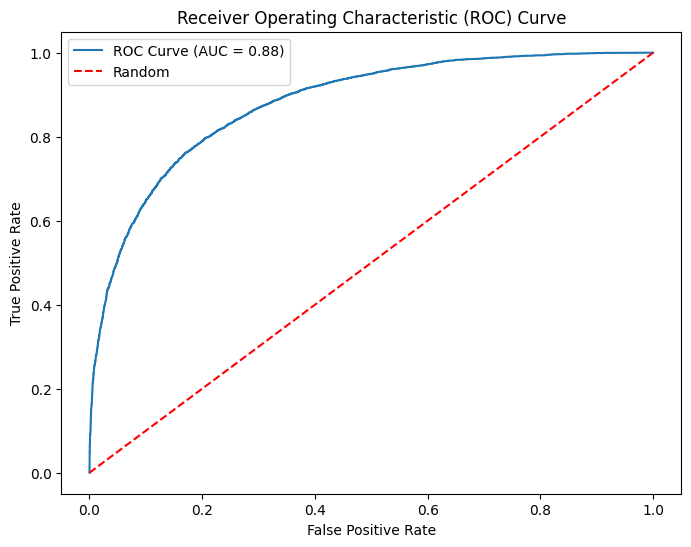



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.80      0.86     16928
         Yes       0.53      0.78      0.63      4775

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.75     21703
weighted avg       0.84      0.80      0.81     21703

Metrics for unweighted KNeighborsClassifier(n_neighbors=15) mode
Confusion Matrix:
[[16191   737]
 [ 3348  1427]]



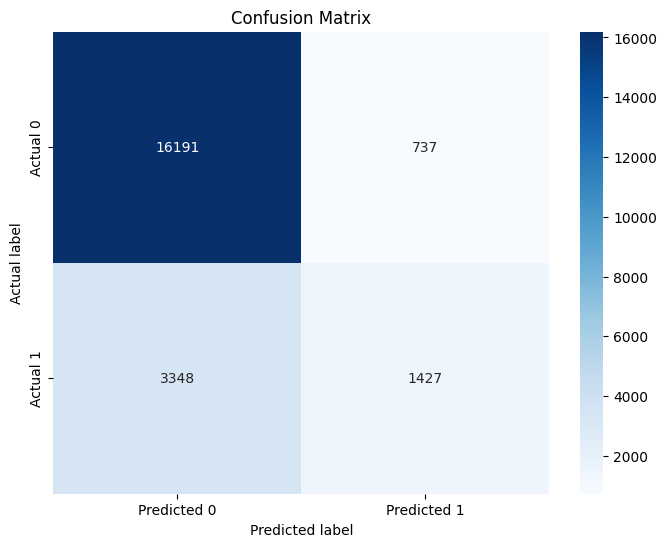



Accuracy: 0.81, Precision: 0.66, Recall: 0.30


ROC-AUC: 0.79


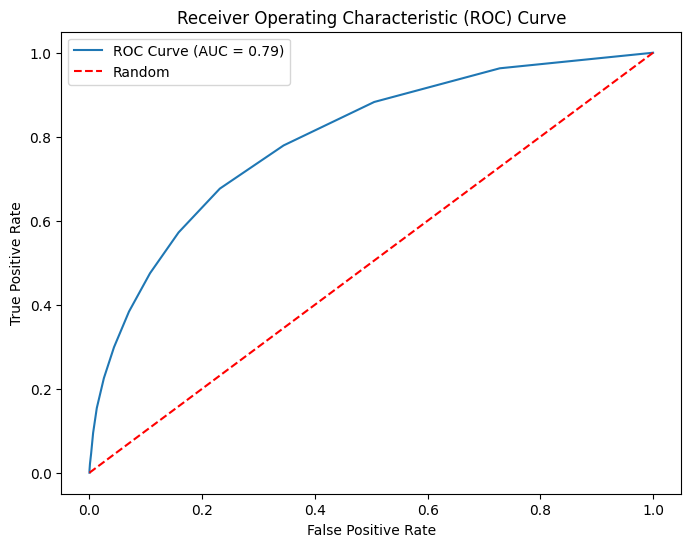



F1 Score: 0.41



Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.96      0.89     16928
         Yes       0.66      0.30      0.41      4775

    accuracy                           0.81     21703
   macro avg       0.74      0.63      0.65     21703
weighted avg       0.79      0.81      0.78     21703



Metrics weighted KNeighborsClassifier(n_neighbors=15) model
Confusion Matrix:
[[13650  3278]
 [ 1083  3692]]



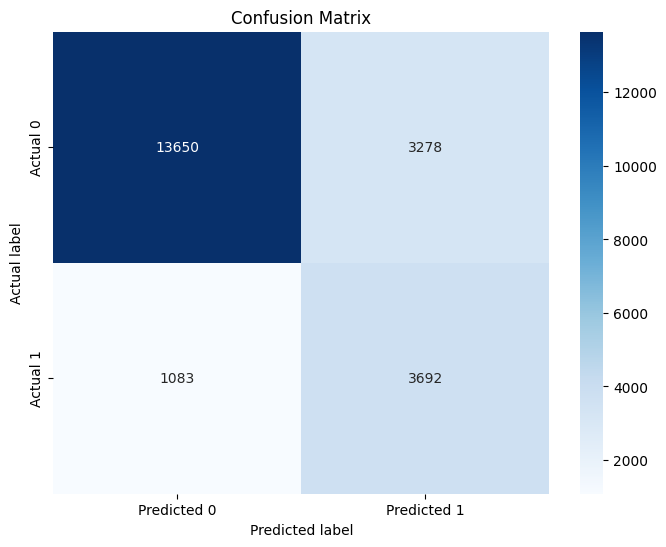



Accuracy: 0.80, Precision: 0.53, Recall: 0.77


ROC-AUC: 0.88


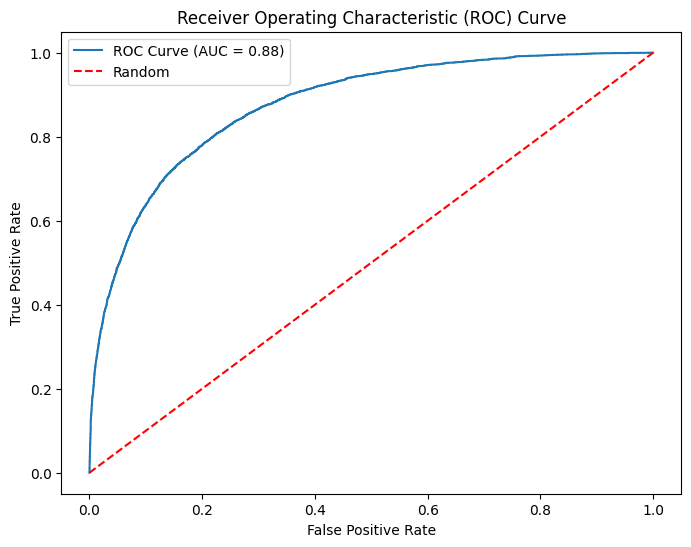



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86     16928
         Yes       0.53      0.77      0.63      4775

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.75     21703
weighted avg       0.84      0.80      0.81     21703

Metrics for unweighted KNeighborsClassifier(n_neighbors=15) mode
Confusion Matrix:
[[16186   742]
 [ 3305  1469]]



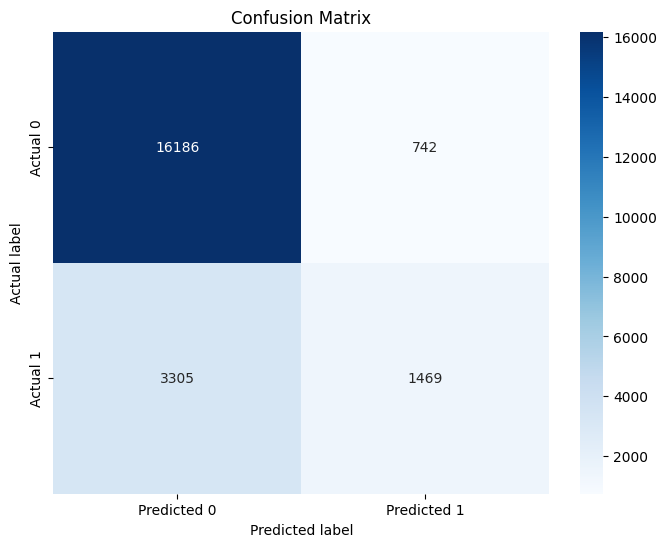



Accuracy: 0.81, Precision: 0.66, Recall: 0.31


ROC-AUC: 0.79


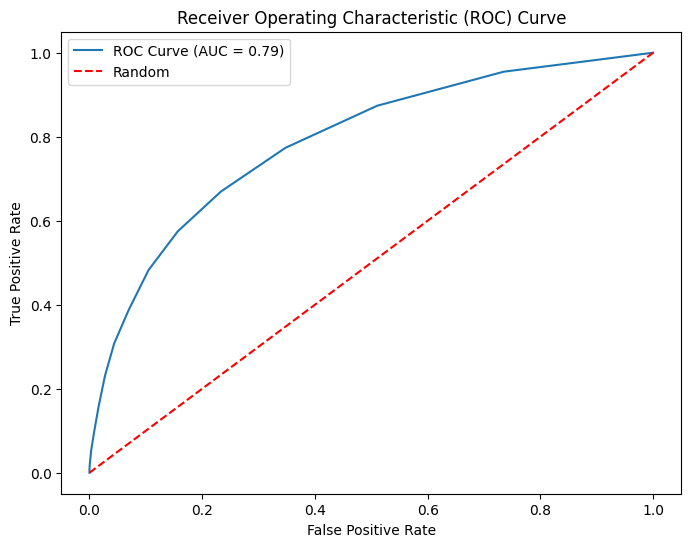



F1 Score: 0.42



Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.96      0.89     16928
         Yes       0.66      0.31      0.42      4774

    accuracy                           0.81     21702
   macro avg       0.75      0.63      0.65     21702
weighted avg       0.79      0.81      0.79     21702



Metrics weighted KNeighborsClassifier(n_neighbors=15) model
Confusion Matrix:
[[13738  3190]
 [ 1105  3669]]



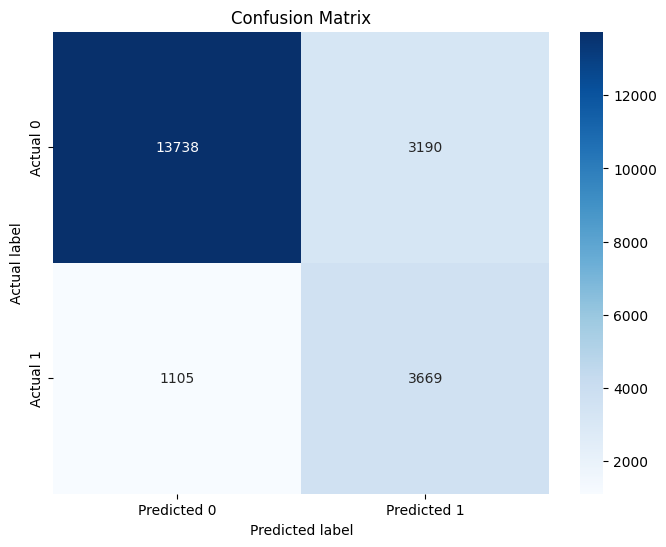



Accuracy: 0.80, Precision: 0.53, Recall: 0.77


ROC-AUC: 0.87


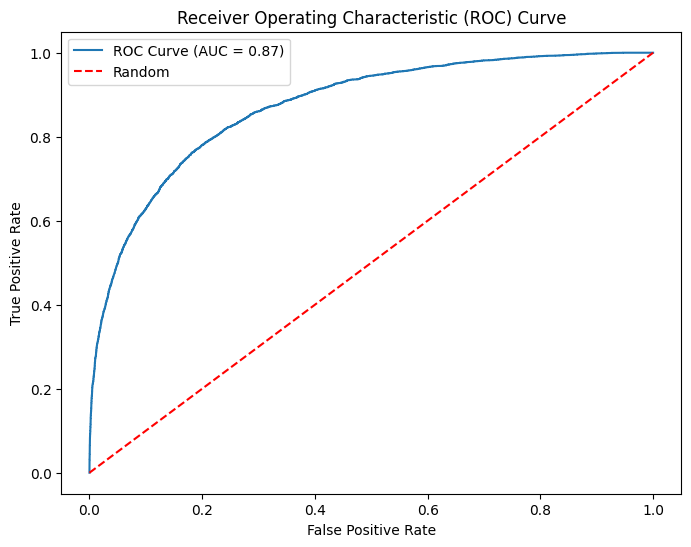



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86     16928
         Yes       0.53      0.77      0.63      4774

    accuracy                           0.80     21702
   macro avg       0.73      0.79      0.75     21702
weighted avg       0.84      0.80      0.81     21702

Metrics for unweighted GaussianNB() mode
Confusion Matrix:
[[10349  6580]
 [ 1344  3430]]



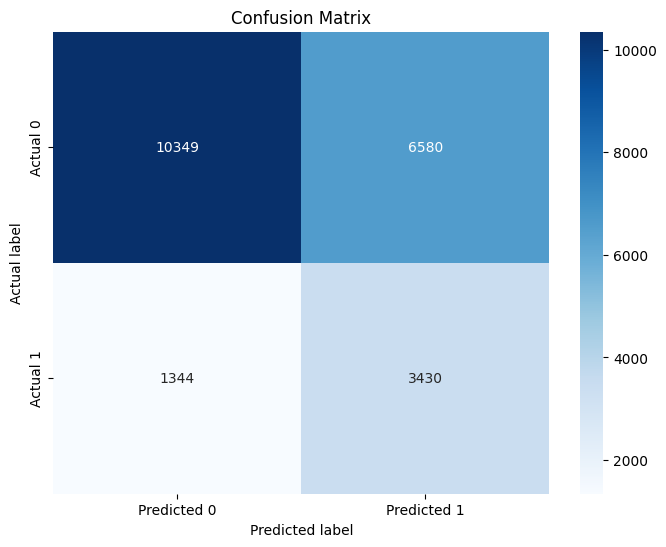



Accuracy: 0.63, Precision: 0.34, Recall: 0.72


ROC-AUC: 0.73


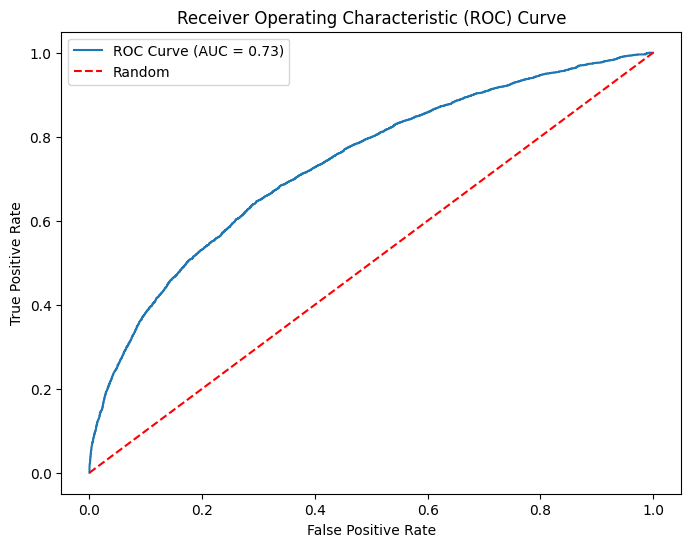



F1 Score: 0.46



Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.61      0.72     16929
         Yes       0.34      0.72      0.46      4774

    accuracy                           0.63     21703
   macro avg       0.61      0.66      0.59     21703
weighted avg       0.77      0.63      0.67     21703



Metrics weighted GaussianNB() model
Confusion Matrix:
[[13600  3329]
 [ 1074  3700]]



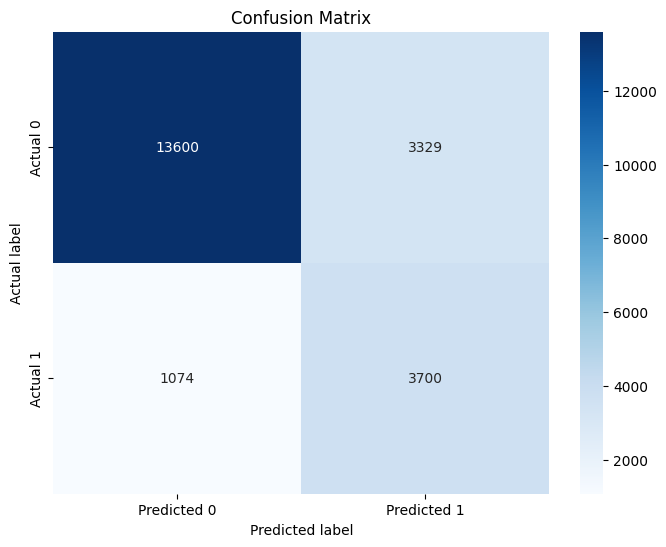



Accuracy: 0.80, Precision: 0.53, Recall: 0.78


ROC-AUC: 0.87


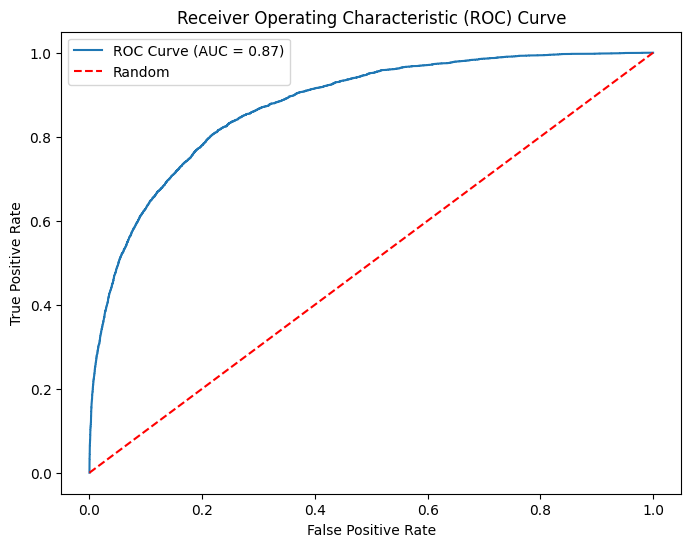



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.80      0.86     16929
         Yes       0.53      0.78      0.63      4774

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.74     21703
weighted avg       0.84      0.80      0.81     21703

Metrics for unweighted GaussianNB() mode
Confusion Matrix:
[[10449  6480]
 [ 1272  3502]]



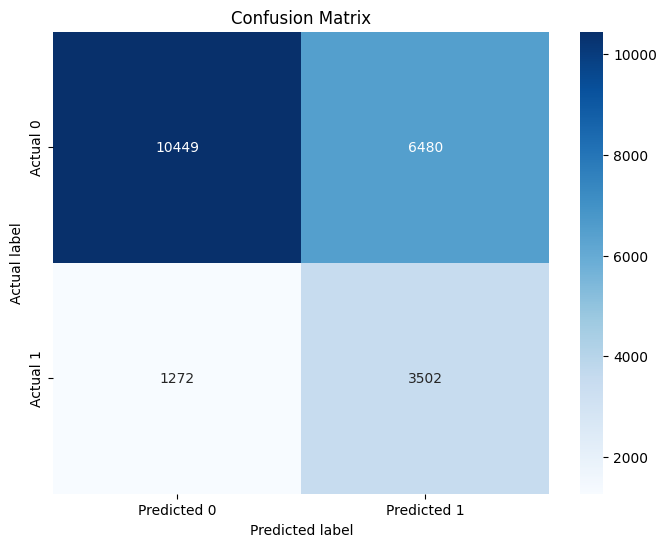



Accuracy: 0.64, Precision: 0.35, Recall: 0.73


ROC-AUC: 0.74


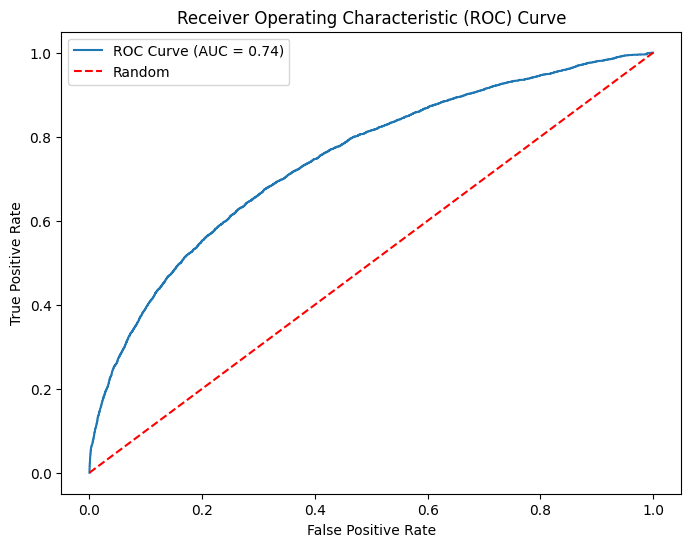



F1 Score: 0.47



Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.62      0.73     16929
         Yes       0.35      0.73      0.47      4774

    accuracy                           0.64     21703
   macro avg       0.62      0.68      0.60     21703
weighted avg       0.77      0.64      0.67     21703



Metrics weighted GaussianNB() model
Confusion Matrix:
[[13791  3138]
 [ 1043  3731]]



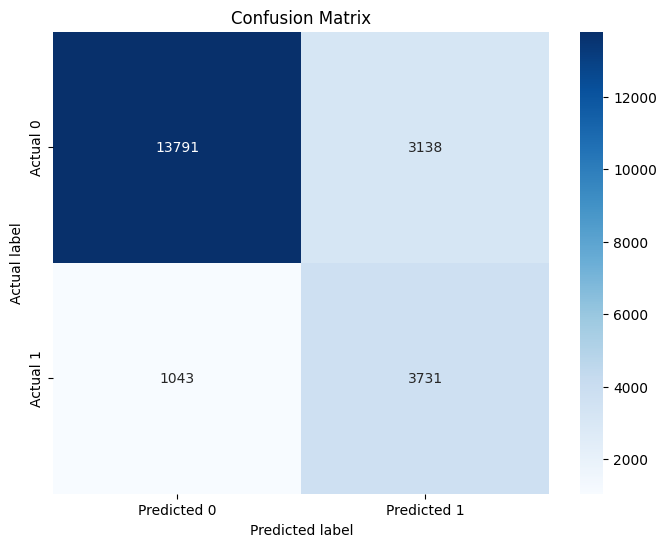



Accuracy: 0.81, Precision: 0.54, Recall: 0.78


ROC-AUC: 0.88


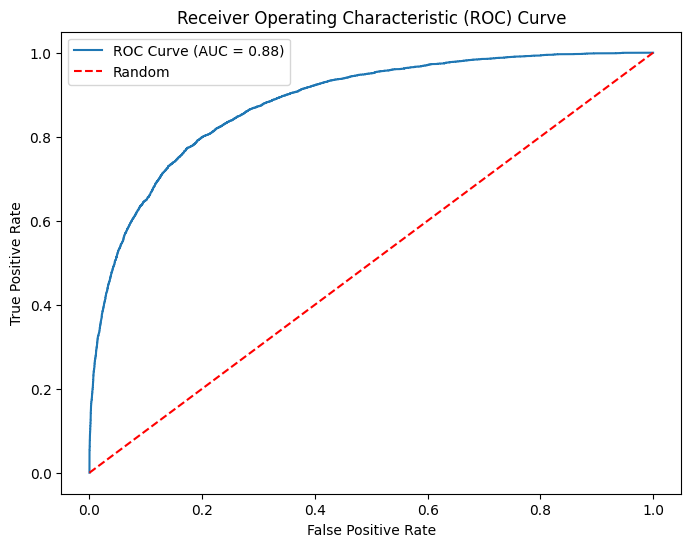



F1 Score: 0.64



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.87     16929
         Yes       0.54      0.78      0.64      4774

    accuracy                           0.81     21703
   macro avg       0.74      0.80      0.75     21703
weighted avg       0.84      0.81      0.82     21703

Metrics for unweighted GaussianNB() mode
Confusion Matrix:
[[10264  6664]
 [ 1305  3470]]



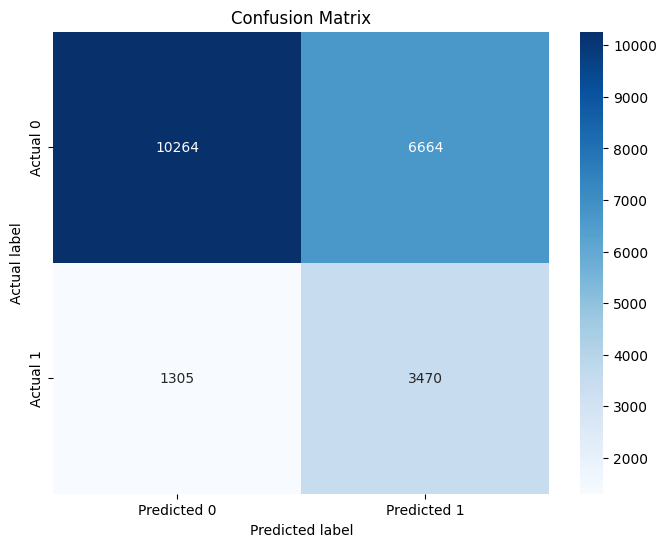



Accuracy: 0.63, Precision: 0.34, Recall: 0.73


ROC-AUC: 0.73


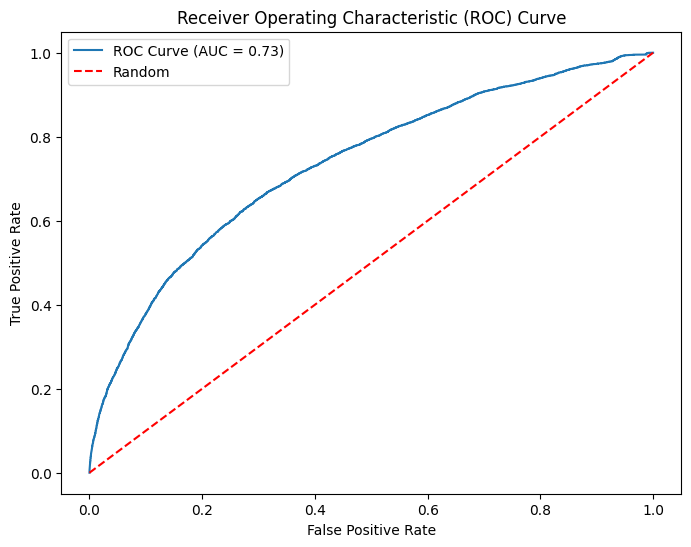



F1 Score: 0.47



Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.61      0.72     16928
         Yes       0.34      0.73      0.47      4775

    accuracy                           0.63     21703
   macro avg       0.61      0.67      0.59     21703
weighted avg       0.77      0.63      0.66     21703



Metrics weighted GaussianNB() model
Confusion Matrix:
[[13620  3308]
 [ 1029  3746]]



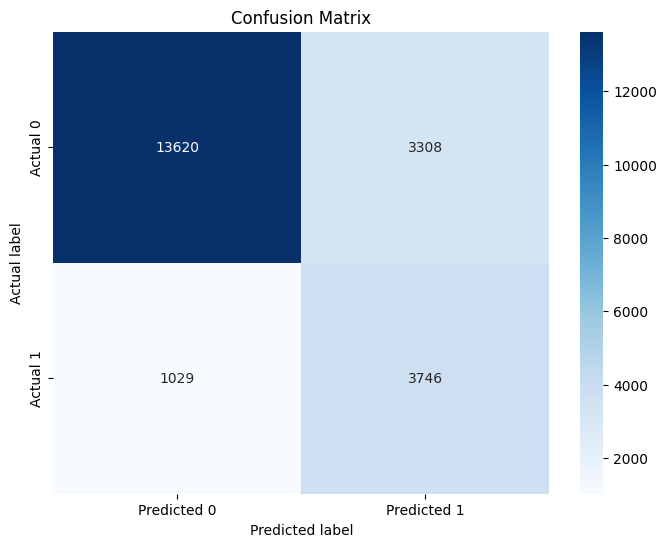



Accuracy: 0.80, Precision: 0.53, Recall: 0.78


ROC-AUC: 0.88


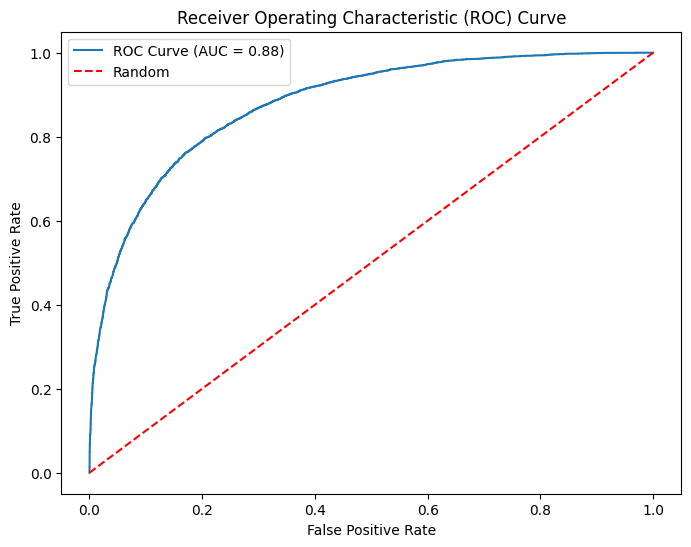



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.80      0.86     16928
         Yes       0.53      0.78      0.63      4775

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.75     21703
weighted avg       0.84      0.80      0.81     21703

Metrics for unweighted GaussianNB() mode
Confusion Matrix:
[[10319  6609]
 [ 1320  3455]]



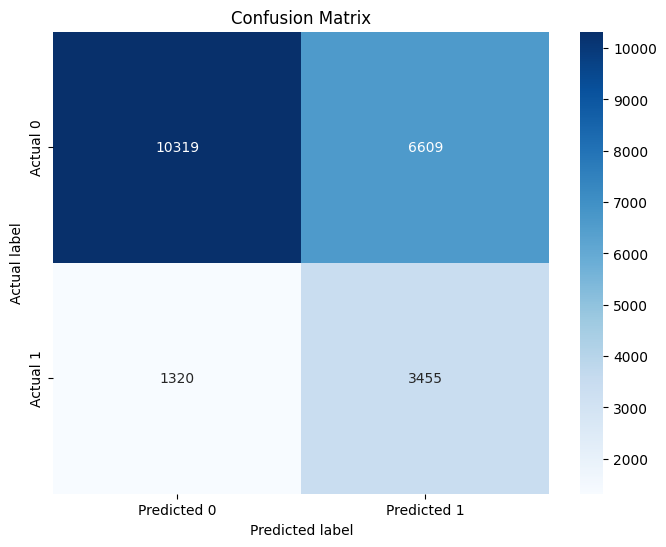



Accuracy: 0.63, Precision: 0.34, Recall: 0.72


ROC-AUC: 0.73


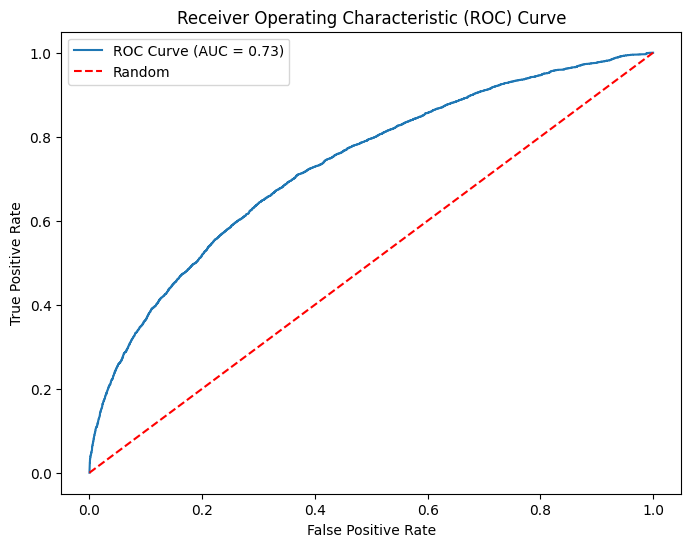



F1 Score: 0.47



Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.61      0.72     16928
         Yes       0.34      0.72      0.47      4775

    accuracy                           0.63     21703
   macro avg       0.61      0.67      0.59     21703
weighted avg       0.77      0.63      0.67     21703



Metrics weighted GaussianNB() model
Confusion Matrix:
[[13650  3278]
 [ 1083  3692]]



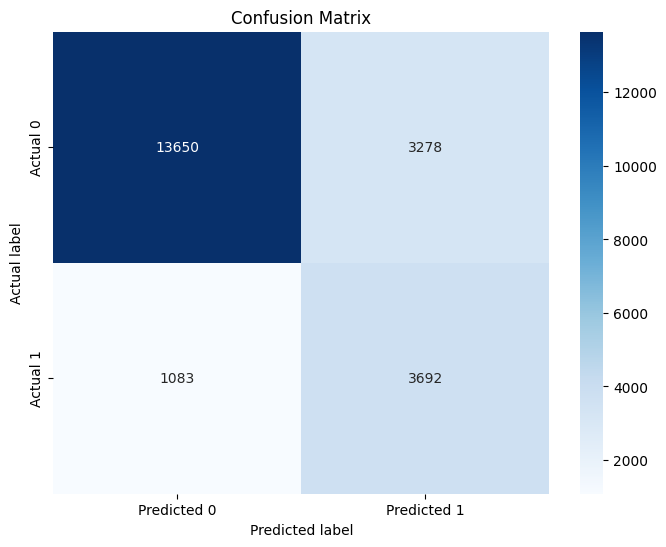



Accuracy: 0.80, Precision: 0.53, Recall: 0.77


ROC-AUC: 0.88


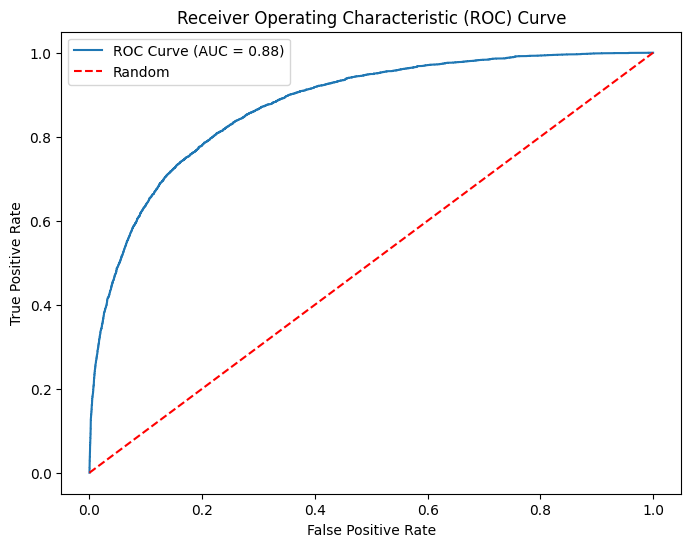



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86     16928
         Yes       0.53      0.77      0.63      4775

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.75     21703
weighted avg       0.84      0.80      0.81     21703

Metrics for unweighted GaussianNB() mode
Confusion Matrix:
[[10298  6630]
 [ 1376  3398]]



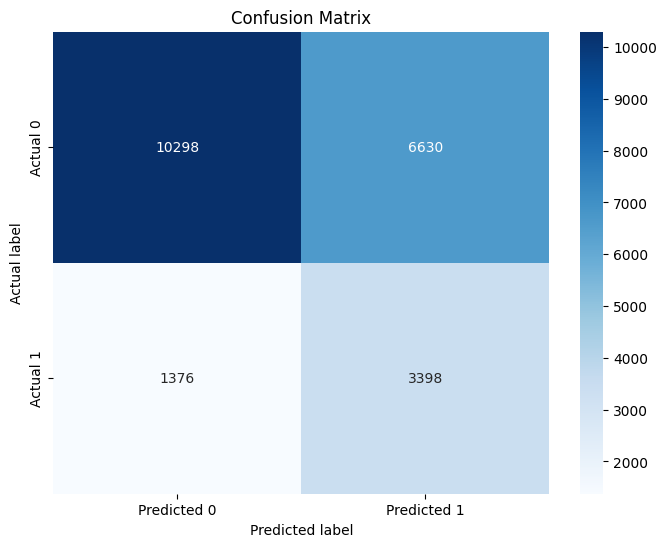



Accuracy: 0.63, Precision: 0.34, Recall: 0.71


ROC-AUC: 0.73


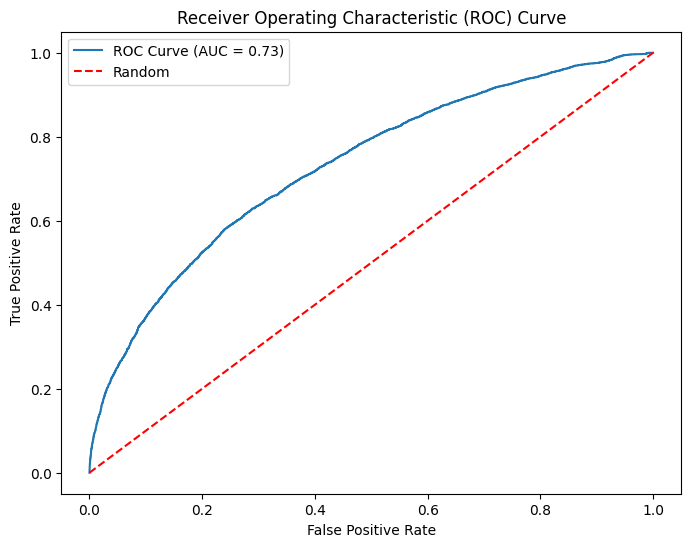



F1 Score: 0.46



Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.61      0.72     16928
         Yes       0.34      0.71      0.46      4774

    accuracy                           0.63     21702
   macro avg       0.61      0.66      0.59     21702
weighted avg       0.76      0.63      0.66     21702



Metrics weighted GaussianNB() model
Confusion Matrix:
[[13738  3190]
 [ 1105  3669]]



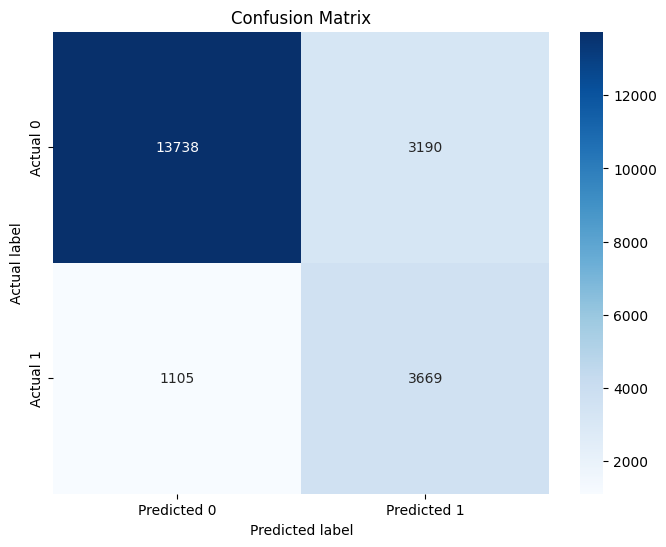



Accuracy: 0.80, Precision: 0.53, Recall: 0.77


ROC-AUC: 0.87


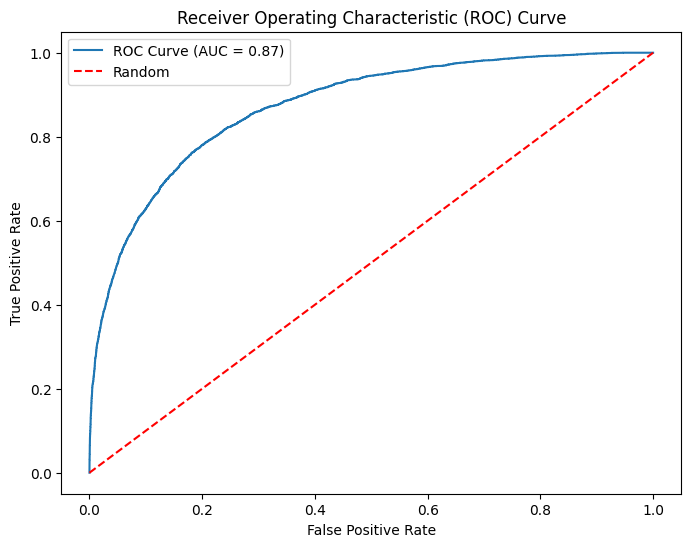



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86     16928
         Yes       0.53      0.77      0.63      4774

    accuracy                           0.80     21702
   macro avg       0.73      0.79      0.75     21702
weighted avg       0.84      0.80      0.81     21702

Metrics for unweighted LinearSVC(C=10) mode
Confusion Matrix:
[[16028   901]
 [ 2350  2424]]



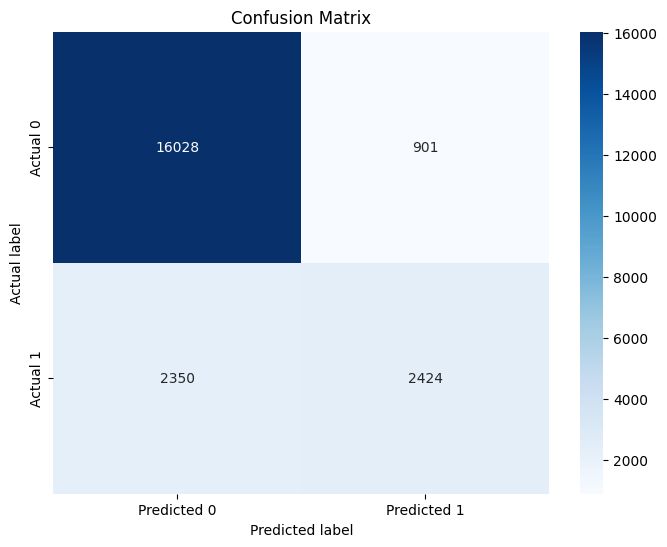



Accuracy: 0.85, Precision: 0.73, Recall: 0.51


ROC-AUC: 0.87


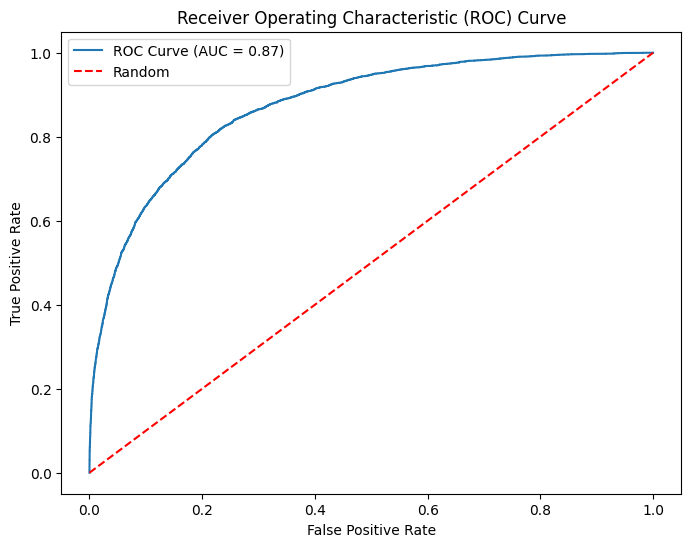



F1 Score: 0.60



Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     16929
         Yes       0.73      0.51      0.60      4774

    accuracy                           0.85     21703
   macro avg       0.80      0.73      0.75     21703
weighted avg       0.84      0.85      0.84     21703



Metrics weighted LinearSVC(C=10) model
Confusion Matrix:
[[13600  3329]
 [ 1074  3700]]



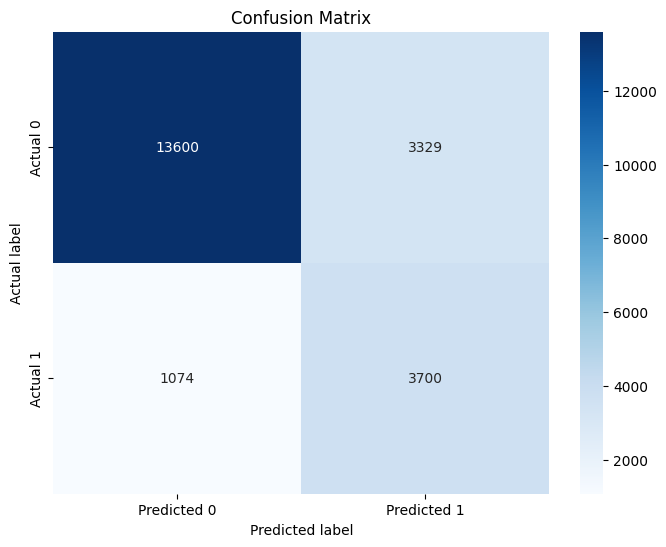



Accuracy: 0.80, Precision: 0.53, Recall: 0.78


ROC-AUC: 0.87


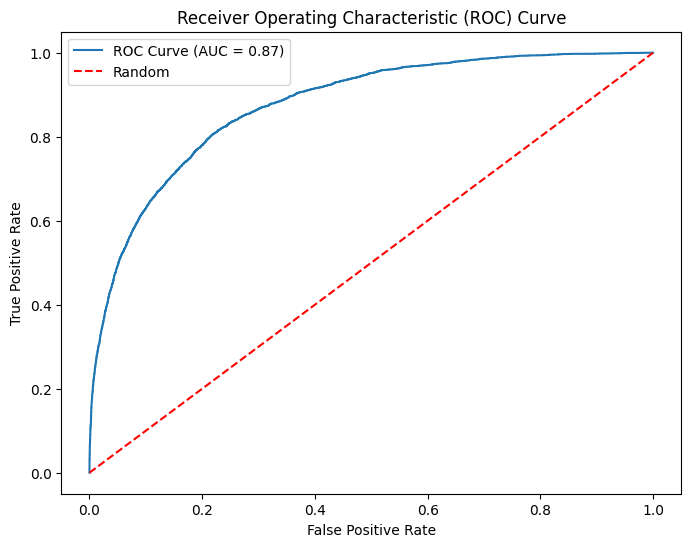



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.80      0.86     16929
         Yes       0.53      0.78      0.63      4774

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.74     21703
weighted avg       0.84      0.80      0.81     21703

Metrics for unweighted LinearSVC(C=10) mode
Confusion Matrix:
[[16142   787]
 [ 2343  2431]]



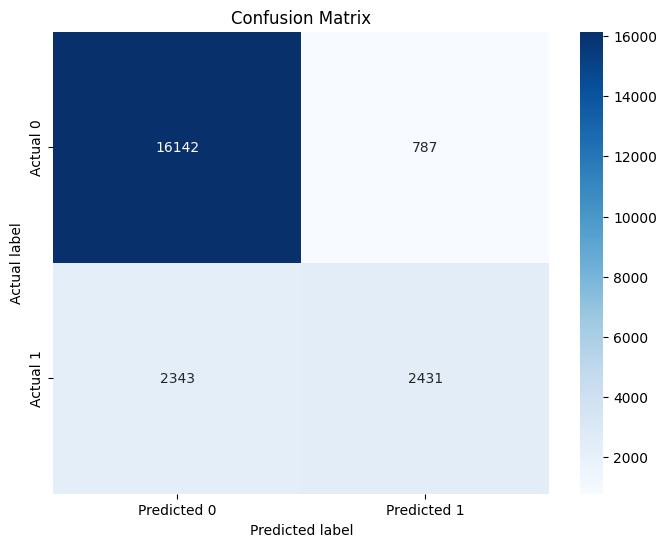



Accuracy: 0.86, Precision: 0.76, Recall: 0.51


ROC-AUC: 0.88


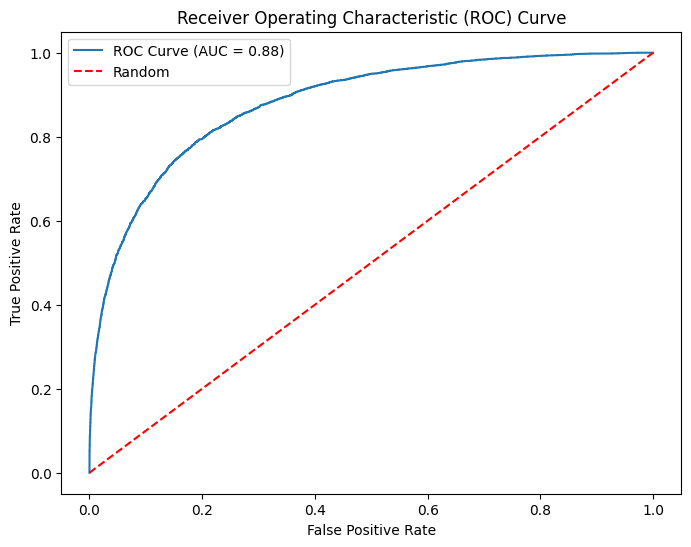



F1 Score: 0.61



Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     16929
         Yes       0.76      0.51      0.61      4774

    accuracy                           0.86     21703
   macro avg       0.81      0.73      0.76     21703
weighted avg       0.85      0.86      0.84     21703



Metrics weighted LinearSVC(C=10) model
Confusion Matrix:
[[13791  3138]
 [ 1043  3731]]



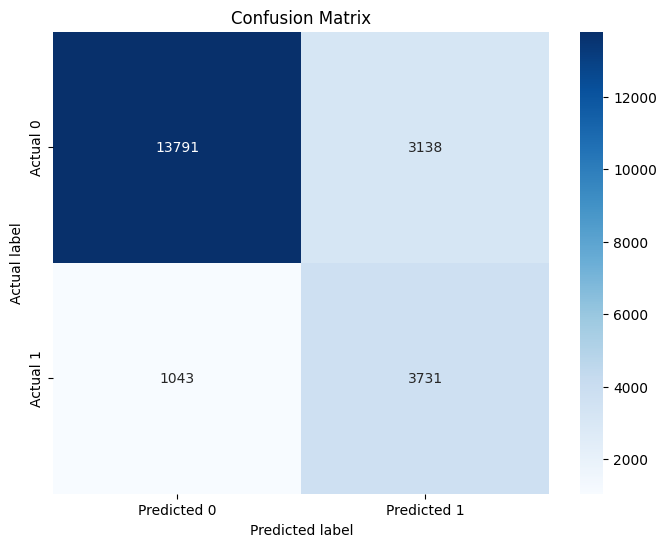



Accuracy: 0.81, Precision: 0.54, Recall: 0.78


ROC-AUC: 0.88


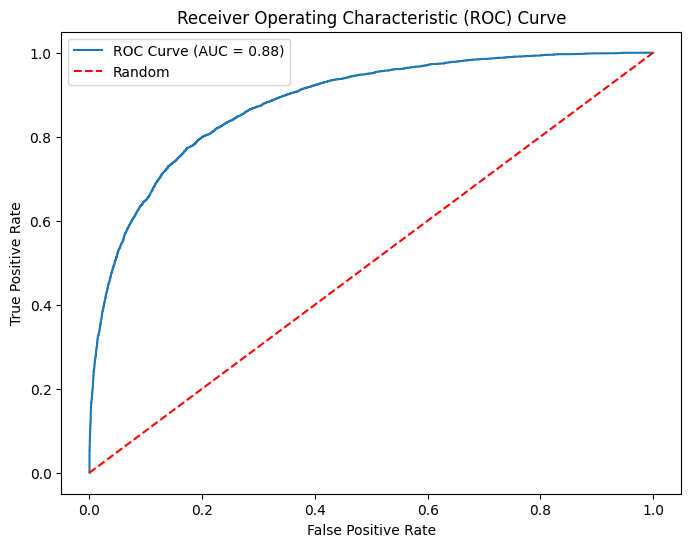



F1 Score: 0.64



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.87     16929
         Yes       0.54      0.78      0.64      4774

    accuracy                           0.81     21703
   macro avg       0.74      0.80      0.75     21703
weighted avg       0.84      0.81      0.82     21703

Metrics for unweighted LinearSVC(C=10) mode
Confusion Matrix:
[[16058   870]
 [ 2292  2483]]



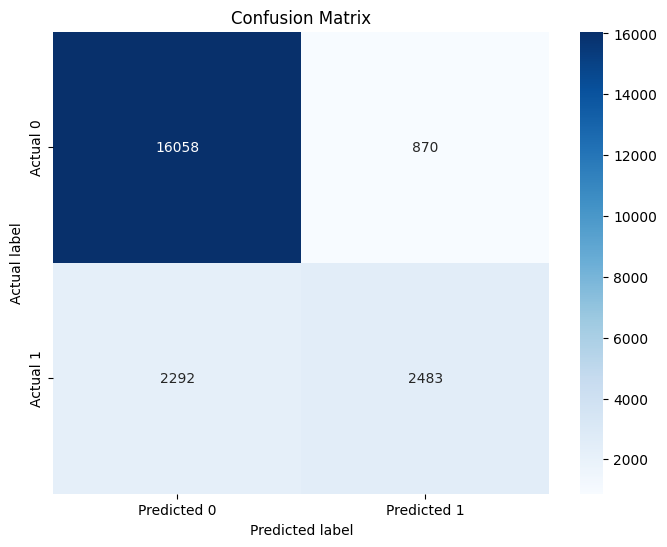



Accuracy: 0.85, Precision: 0.74, Recall: 0.52


ROC-AUC: 0.88


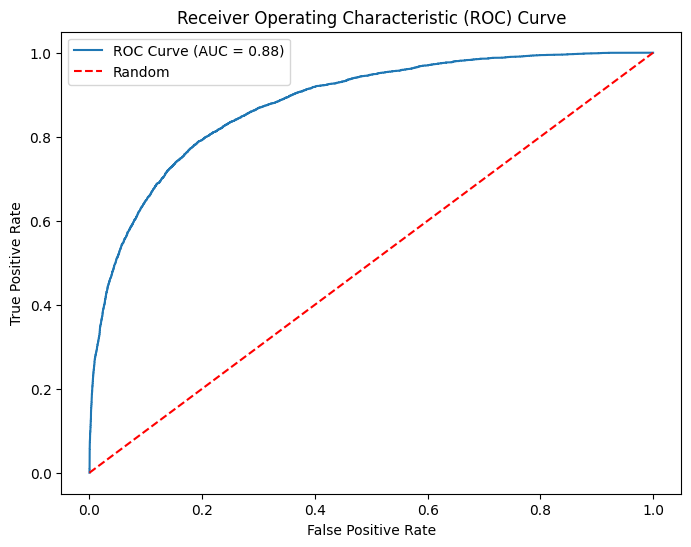



F1 Score: 0.61



Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.95      0.91     16928
         Yes       0.74      0.52      0.61      4775

    accuracy                           0.85     21703
   macro avg       0.81      0.73      0.76     21703
weighted avg       0.85      0.85      0.84     21703



Metrics weighted LinearSVC(C=10) model
Confusion Matrix:
[[13620  3308]
 [ 1029  3746]]



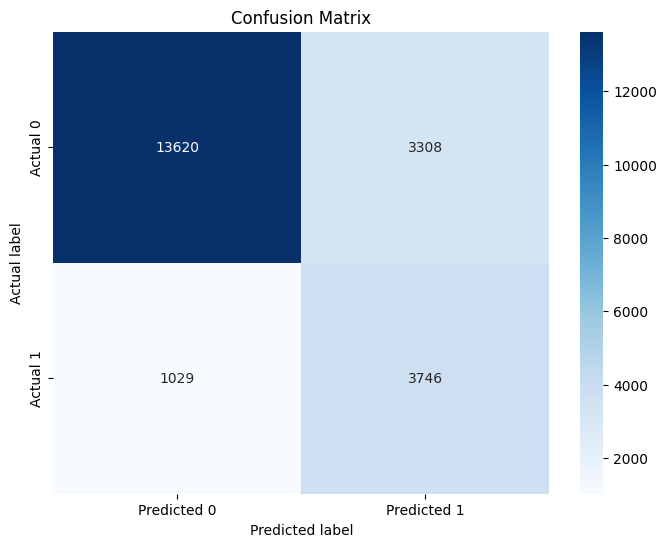



Accuracy: 0.80, Precision: 0.53, Recall: 0.78


ROC-AUC: 0.88


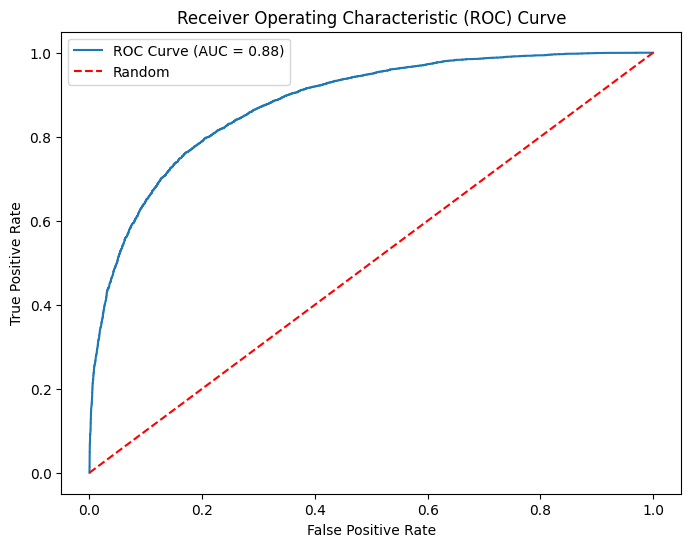



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.80      0.86     16928
         Yes       0.53      0.78      0.63      4775

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.75     21703
weighted avg       0.84      0.80      0.81     21703

Metrics for unweighted LinearSVC(C=10) mode
Confusion Matrix:
[[16115   813]
 [ 2451  2324]]



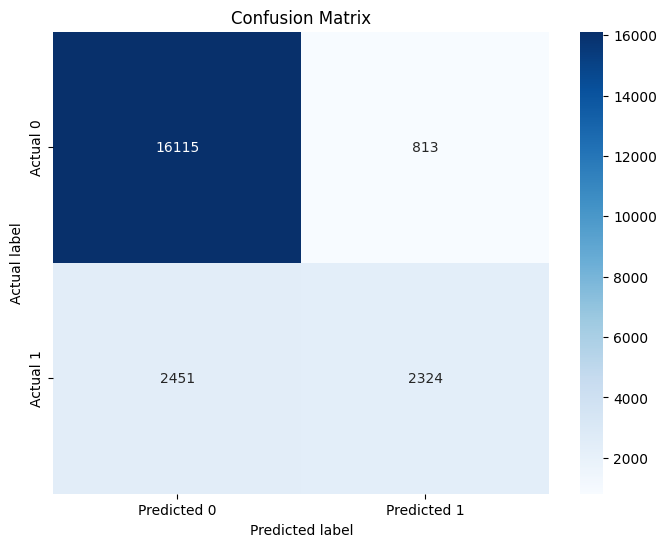



Accuracy: 0.85, Precision: 0.74, Recall: 0.49


ROC-AUC: 0.87


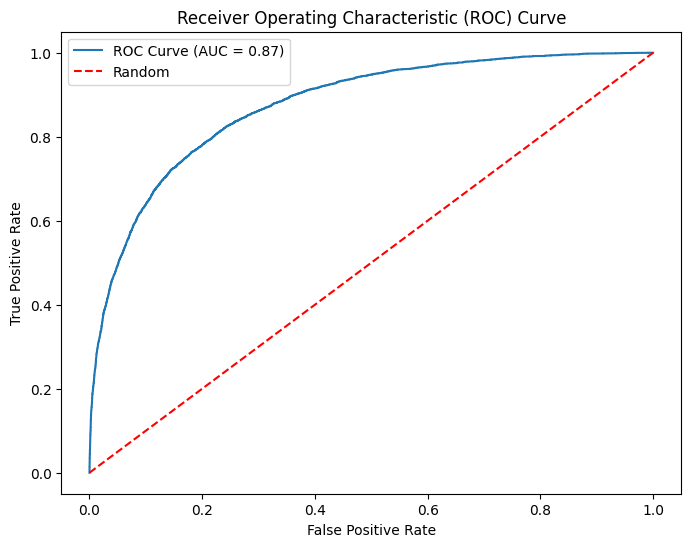



F1 Score: 0.59



Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     16928
         Yes       0.74      0.49      0.59      4775

    accuracy                           0.85     21703
   macro avg       0.80      0.72      0.75     21703
weighted avg       0.84      0.85      0.84     21703



Metrics weighted LinearSVC(C=10) model
Confusion Matrix:
[[13650  3278]
 [ 1083  3692]]



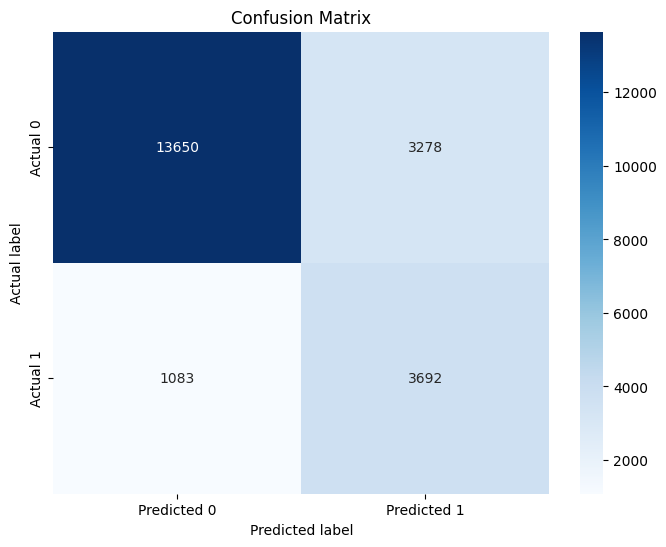



Accuracy: 0.80, Precision: 0.53, Recall: 0.77


ROC-AUC: 0.88


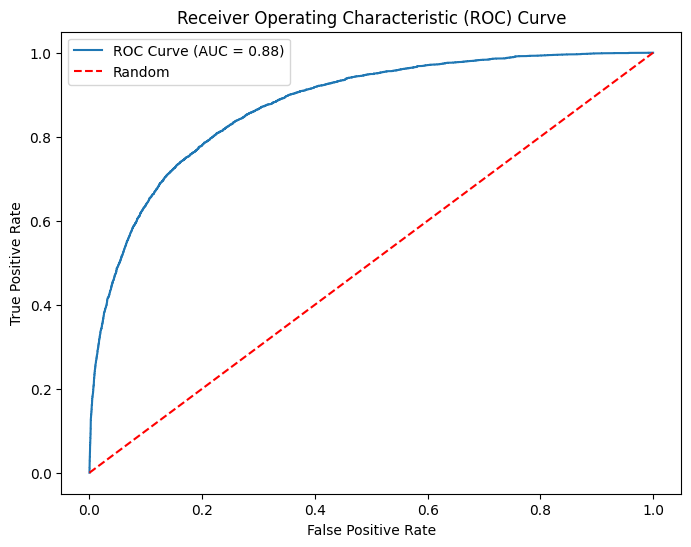



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86     16928
         Yes       0.53      0.77      0.63      4775

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.75     21703
weighted avg       0.84      0.80      0.81     21703

Metrics for unweighted LinearSVC(C=10) mode
Confusion Matrix:
[[16094   834]
 [ 2388  2386]]



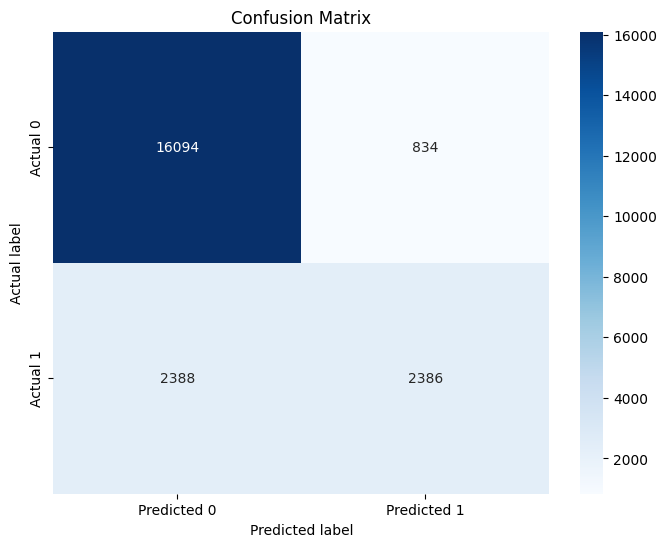



Accuracy: 0.85, Precision: 0.74, Recall: 0.50


ROC-AUC: 0.87


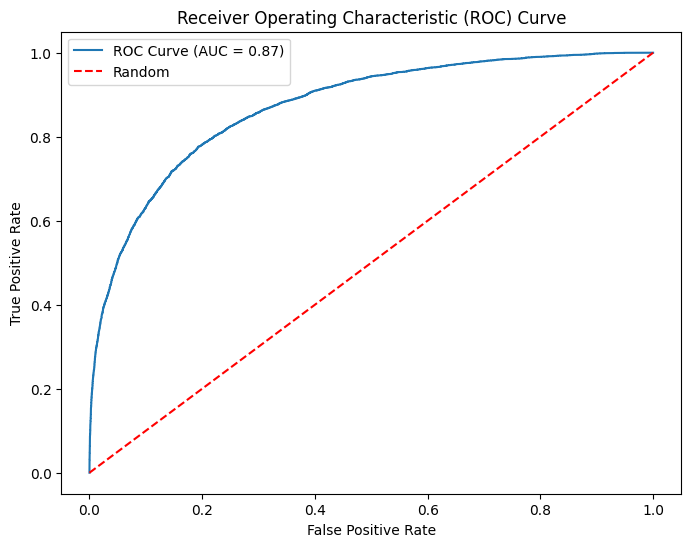



F1 Score: 0.60



Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     16928
         Yes       0.74      0.50      0.60      4774

    accuracy                           0.85     21702
   macro avg       0.81      0.73      0.75     21702
weighted avg       0.84      0.85      0.84     21702



Metrics weighted LinearSVC(C=10) model
Confusion Matrix:
[[13738  3190]
 [ 1105  3669]]



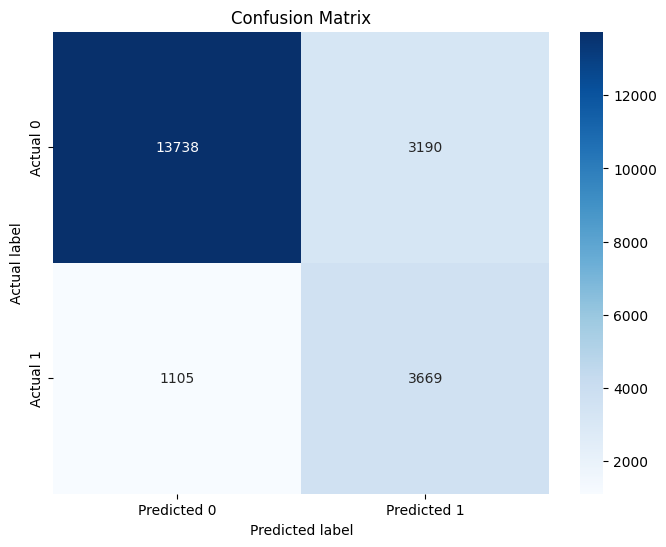



Accuracy: 0.80, Precision: 0.53, Recall: 0.77


ROC-AUC: 0.87


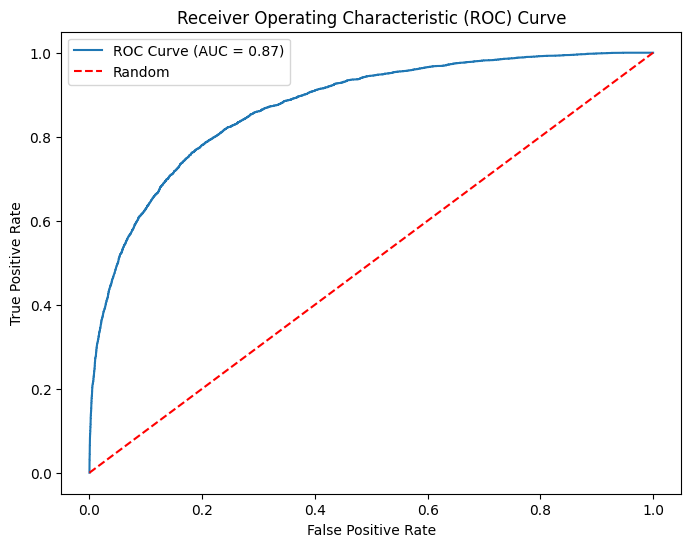



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86     16928
         Yes       0.53      0.77      0.63      4774

    accuracy                           0.80     21702
   macro avg       0.73      0.79      0.75     21702
weighted avg       0.84      0.80      0.81     21702



In [ ]:
models = [logreg, knn, naive_bayes, best_linear_svc]

# Weighted models
weighted_models = [LinearSVC(class_weight='balanced') for _ in range(len(models))]

#X_train_scaled.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

for i, (model, weighted_model) in enumerate(zip(models, weighted_models)):
    # Train models
    model.fit(X_train_scaled, y_train)
    weighted_model.fit(X_train_scaled, y_train)

    # Stratified K-Fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X_train_scaled, y_train):
        X_fold_train, X_fold_test = X_train_scaled[train_index], X_train_scaled[test_index]
        y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]

        model.fit(X_fold_train, y_fold_train)
        weighted_model.fit(X_fold_train, y_fold_train)

        print(f"Metrics for unweighted {model} mode")
        evaluate_model(model, X_fold_test, y_fold_test)

        print("\n")
        print(f"Metrics weighted {model} model")
        evaluate_model(weighted_model, X_fold_test, y_fold_test)

In [ ]:
models = [logreg, knn, naive_bayes, best_linear_svc]

weighted_models = [LinearSVC(class_weight='balanced') for _ in range(len(models))]

y_train.reset_index(drop=True, inplace=True)

for model, weighted_model in zip(models, weighted_models):
    # Train models
    model.fit(X_train_scaled, y_train)
    weighted_model.fit(X_train_scaled, y_train)

**Unweighted models**

Metrics for unweighted LinearSVC(C=10) model
Confusion Matrix:
[[16036   893]
 [ 2343  2431]]



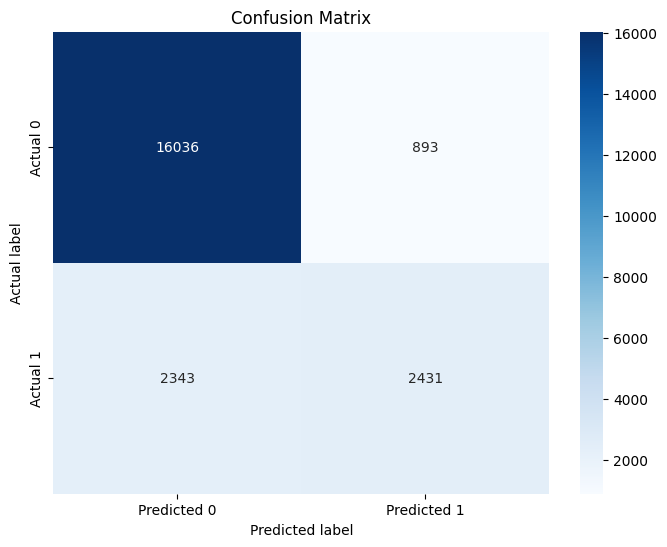



Accuracy: 0.85, Precision: 0.73, Recall: 0.51


ROC-AUC: 0.87


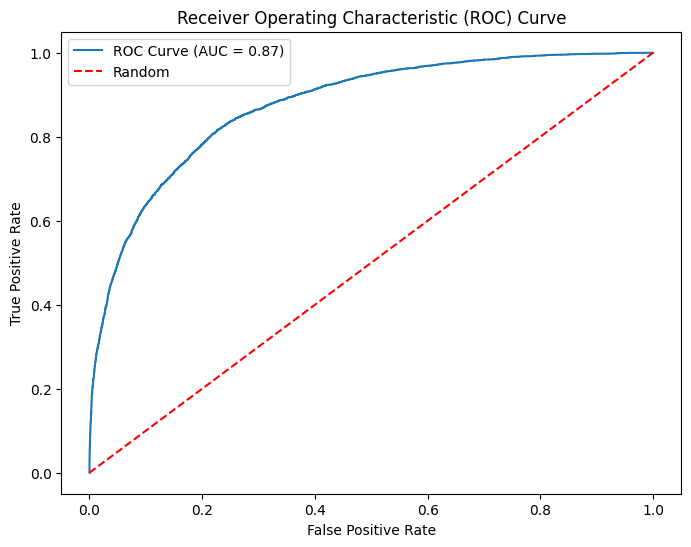



F1 Score: 0.60



Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     16929
         Yes       0.73      0.51      0.60      4774

    accuracy                           0.85     21703
   macro avg       0.80      0.73      0.75     21703
weighted avg       0.84      0.85      0.84     21703

Metrics for unweighted LinearSVC(C=10) model
Confusion Matrix:
[[16139   790]
 [ 2315  2459]]



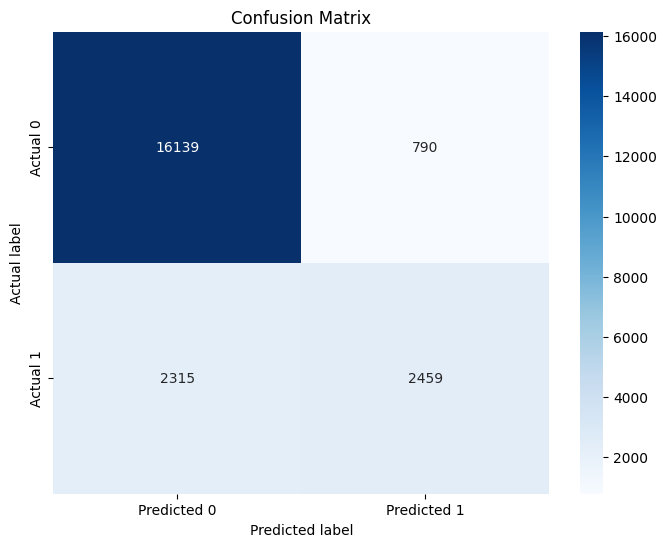



Accuracy: 0.86, Precision: 0.76, Recall: 0.52


ROC-AUC: 0.88


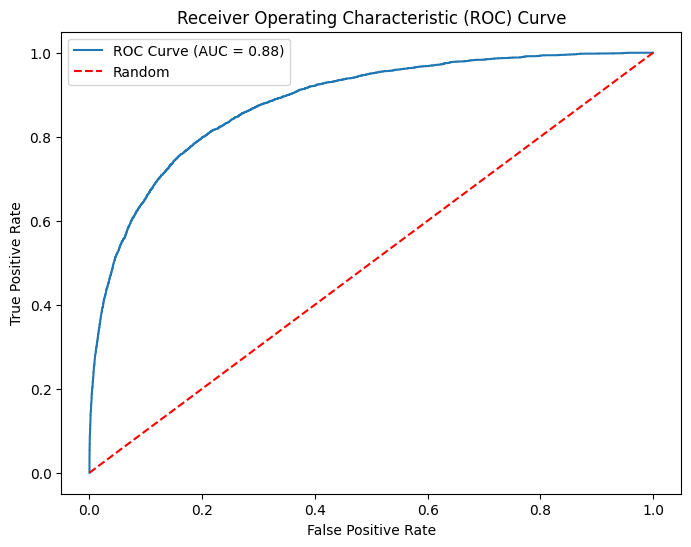



F1 Score: 0.61



Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     16929
         Yes       0.76      0.52      0.61      4774

    accuracy                           0.86     21703
   macro avg       0.82      0.73      0.76     21703
weighted avg       0.85      0.86      0.85     21703

Metrics for unweighted LinearSVC(C=10) model
Confusion Matrix:
[[16061   867]
 [ 2283  2492]]



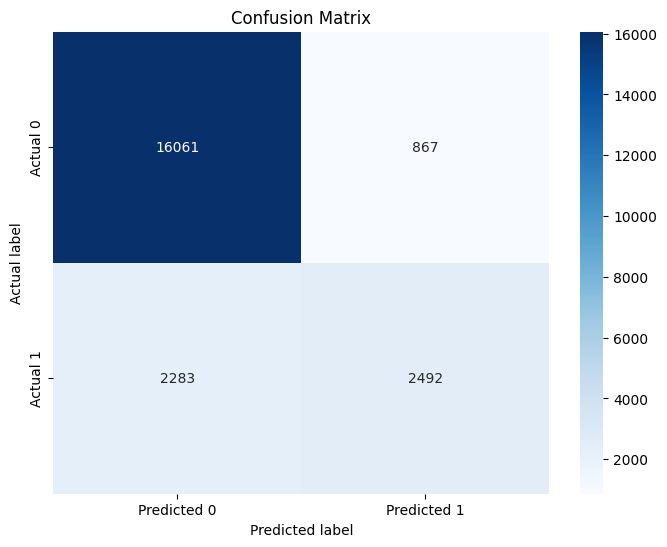



Accuracy: 0.85, Precision: 0.74, Recall: 0.52


ROC-AUC: 0.88


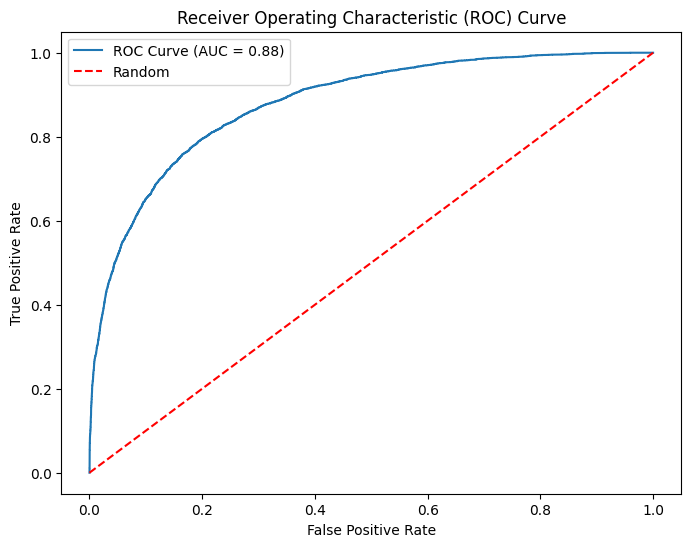



F1 Score: 0.61



Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.95      0.91     16928
         Yes       0.74      0.52      0.61      4775

    accuracy                           0.85     21703
   macro avg       0.81      0.74      0.76     21703
weighted avg       0.85      0.85      0.85     21703

Metrics for unweighted LinearSVC(C=10) model
Confusion Matrix:
[[16087   841]
 [ 2408  2367]]



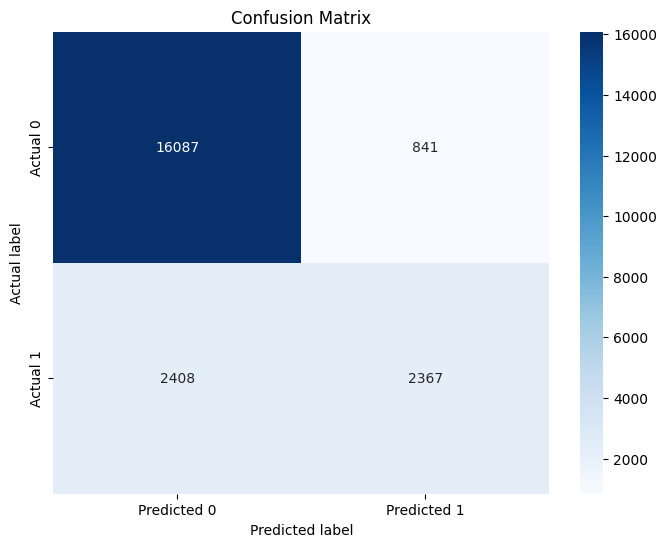



Accuracy: 0.85, Precision: 0.74, Recall: 0.50


ROC-AUC: 0.88


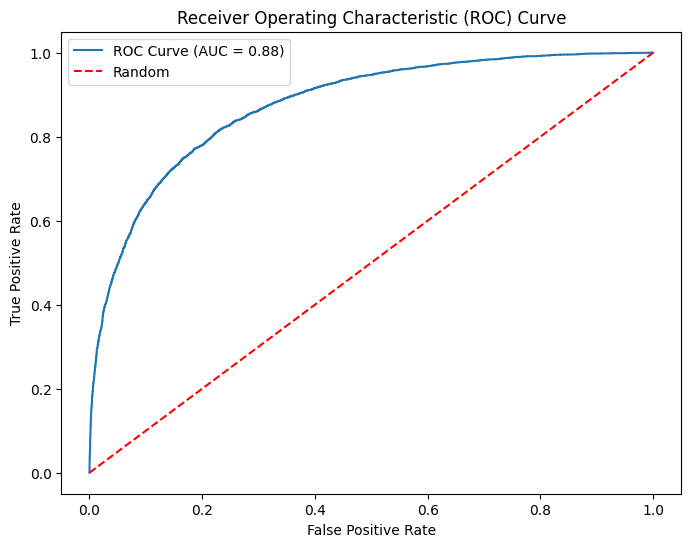



F1 Score: 0.59



Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     16928
         Yes       0.74      0.50      0.59      4775

    accuracy                           0.85     21703
   macro avg       0.80      0.72      0.75     21703
weighted avg       0.84      0.85      0.84     21703

Metrics for unweighted LinearSVC(C=10) model
Confusion Matrix:
[[16092   836]
 [ 2364  2410]]



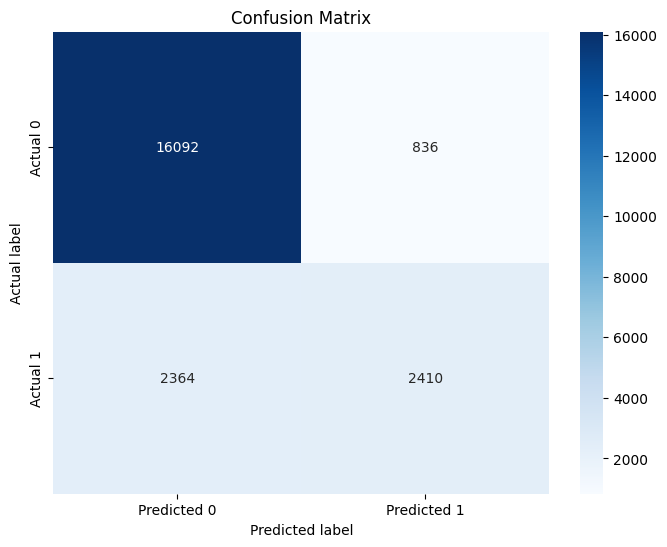



Accuracy: 0.85, Precision: 0.74, Recall: 0.50


ROC-AUC: 0.87


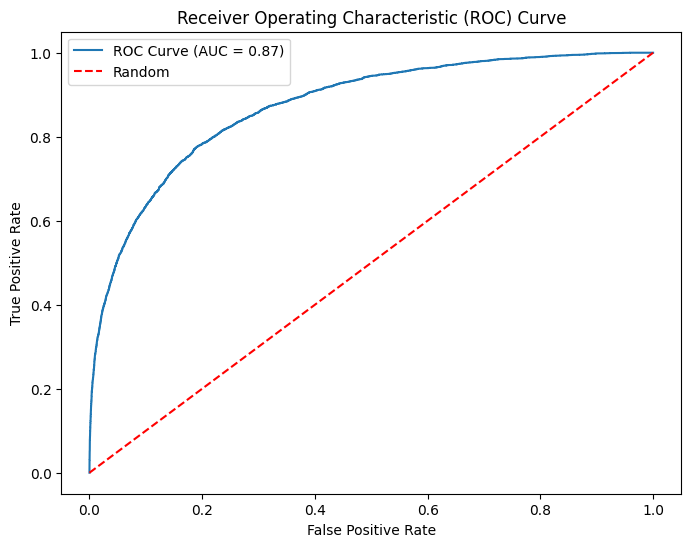



F1 Score: 0.60



Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     16928
         Yes       0.74      0.50      0.60      4774

    accuracy                           0.85     21702
   macro avg       0.81      0.73      0.76     21702
weighted avg       0.84      0.85      0.84     21702



In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X_train_scaled, y_train):
    X_fold_train, X_fold_test = X_train_scaled[train_index], X_train_scaled[test_index]
    y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]

    print(f"Metrics for unweighted {model} model")
    evaluate_model(model, X_fold_test, y_fold_test)

**Weighted models**

Metrics weighted LinearSVC(C=10) model
Confusion Matrix:
[[13595  3334]
 [ 1066  3708]]



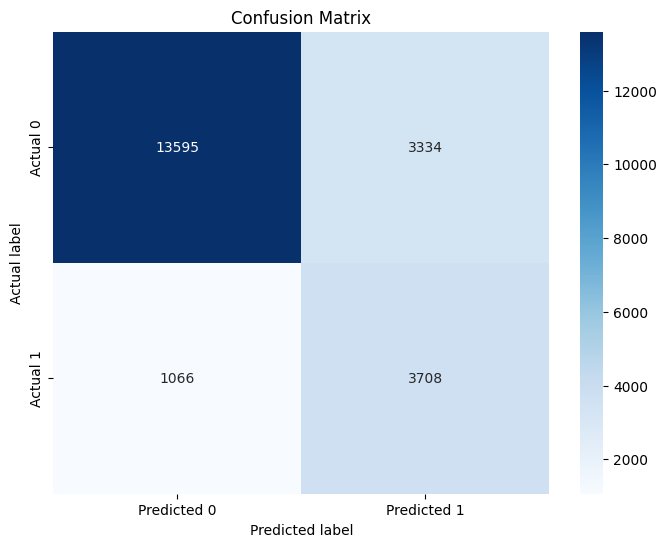



Accuracy: 0.80, Precision: 0.53, Recall: 0.78


ROC-AUC: 0.88


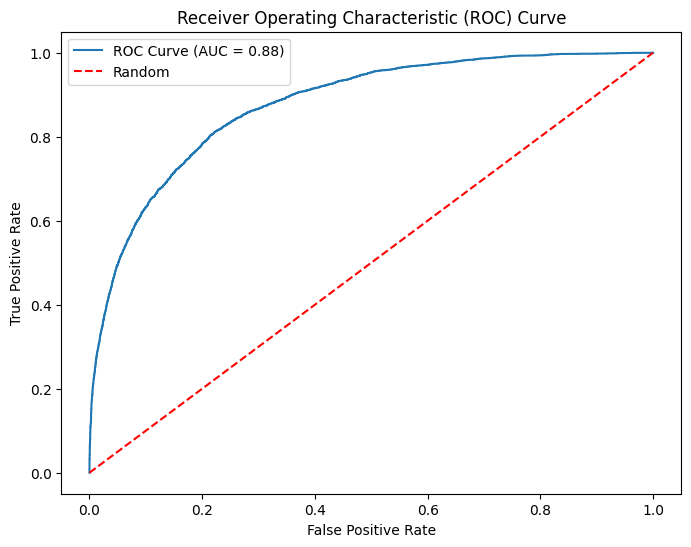



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.80      0.86     16929
         Yes       0.53      0.78      0.63      4774

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.74     21703
weighted avg       0.84      0.80      0.81     21703

Metrics weighted LinearSVC(C=10) model
Confusion Matrix:
[[13801  3128]
 [ 1037  3737]]



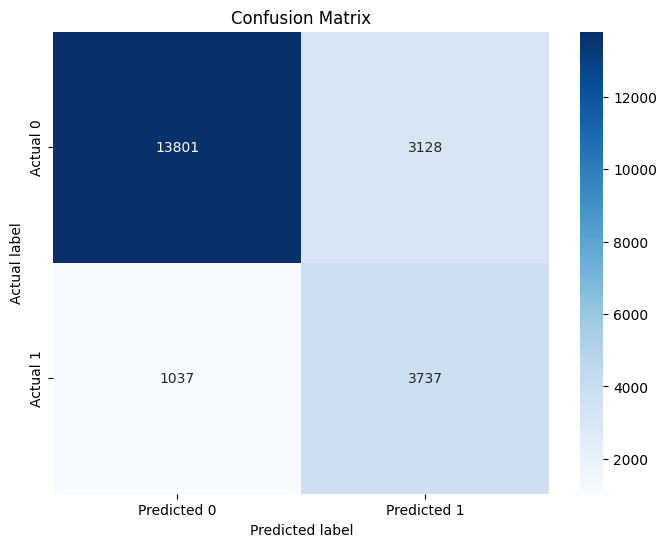



Accuracy: 0.81, Precision: 0.54, Recall: 0.78


ROC-AUC: 0.88


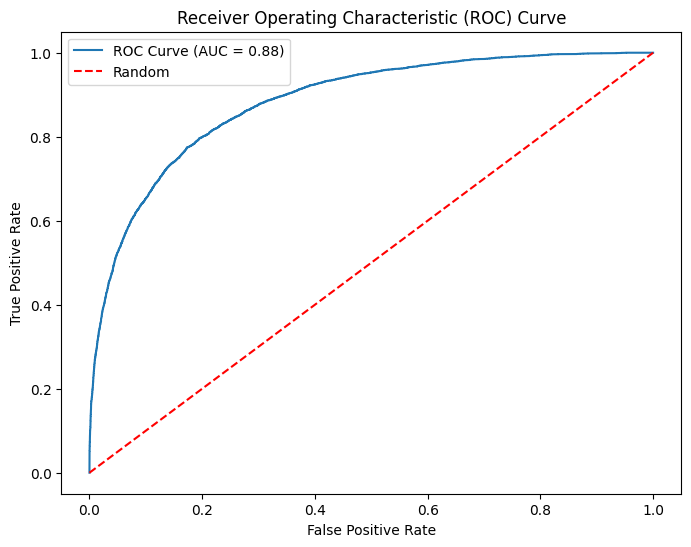



F1 Score: 0.64



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.82      0.87     16929
         Yes       0.54      0.78      0.64      4774

    accuracy                           0.81     21703
   macro avg       0.74      0.80      0.76     21703
weighted avg       0.85      0.81      0.82     21703

Metrics weighted LinearSVC(C=10) model
Confusion Matrix:
[[13656  3272]
 [ 1027  3748]]



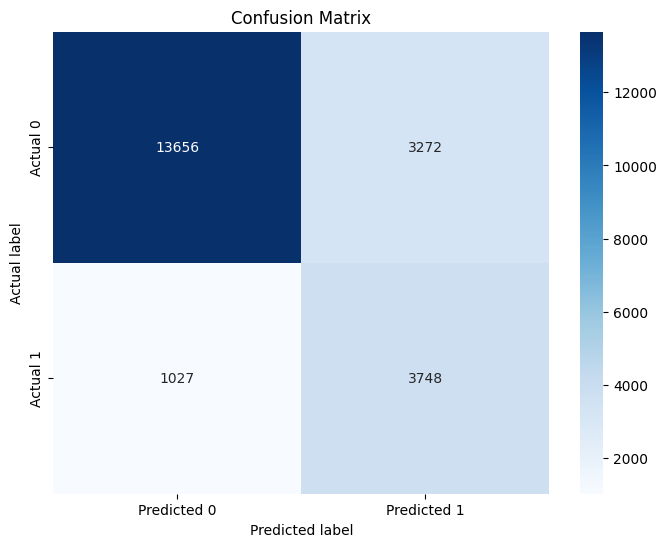



Accuracy: 0.80, Precision: 0.53, Recall: 0.78


ROC-AUC: 0.88


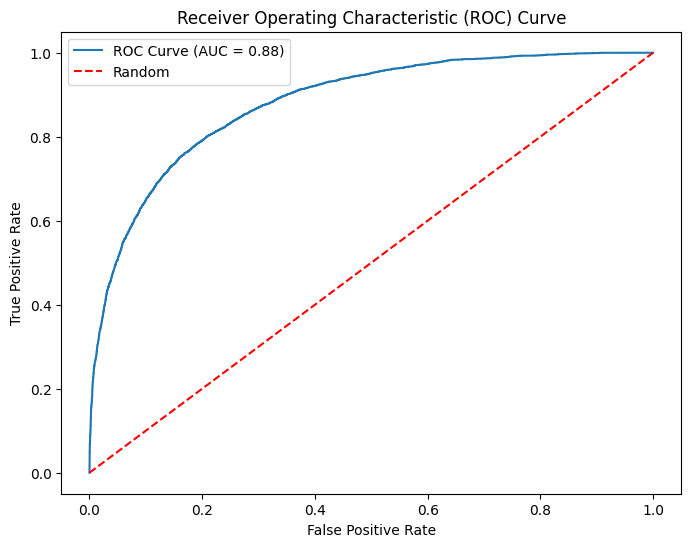



F1 Score: 0.64



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86     16928
         Yes       0.53      0.78      0.64      4775

    accuracy                           0.80     21703
   macro avg       0.73      0.80      0.75     21703
weighted avg       0.84      0.80      0.81     21703

Metrics weighted LinearSVC(C=10) model
Confusion Matrix:
[[13652  3276]
 [ 1066  3709]]



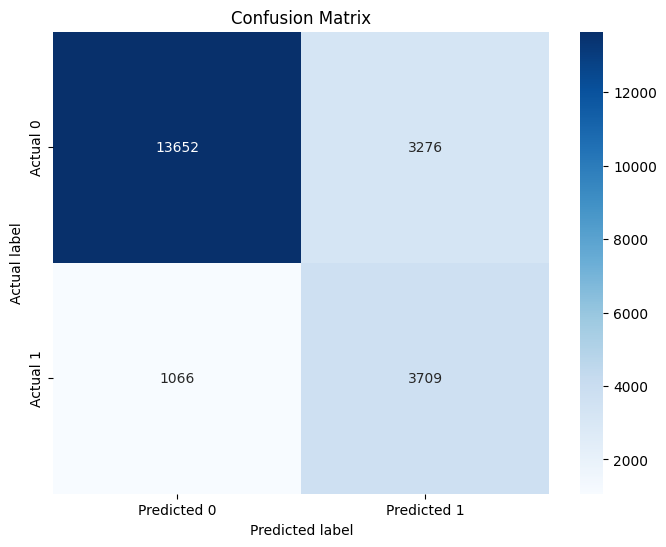



Accuracy: 0.80, Precision: 0.53, Recall: 0.78


ROC-AUC: 0.88


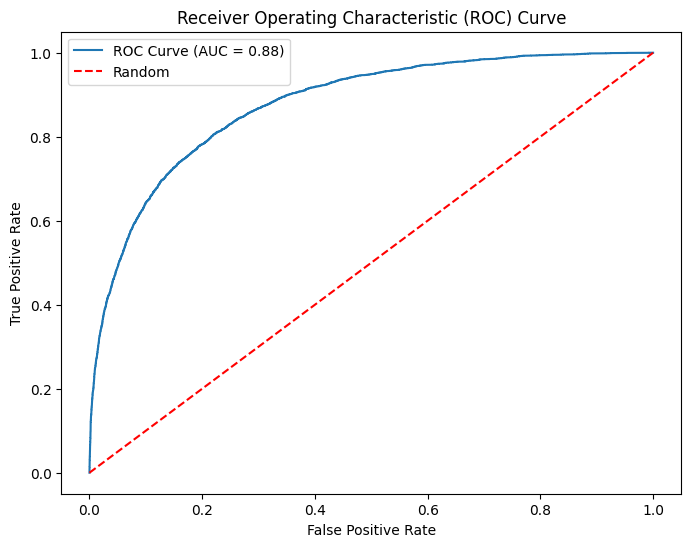



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86     16928
         Yes       0.53      0.78      0.63      4775

    accuracy                           0.80     21703
   macro avg       0.73      0.79      0.75     21703
weighted avg       0.84      0.80      0.81     21703

Metrics weighted LinearSVC(C=10) model
Confusion Matrix:
[[13729  3199]
 [ 1089  3685]]



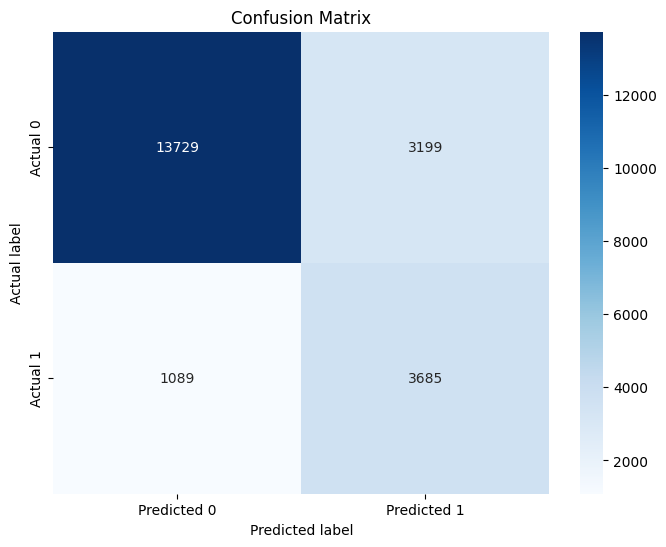



Accuracy: 0.80, Precision: 0.54, Recall: 0.77


ROC-AUC: 0.87


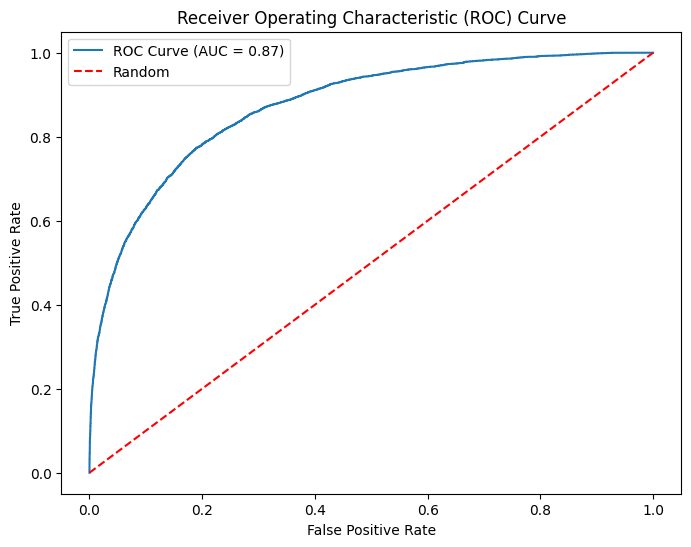



F1 Score: 0.63



Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86     16928
         Yes       0.54      0.77      0.63      4774

    accuracy                           0.80     21702
   macro avg       0.73      0.79      0.75     21702
weighted avg       0.84      0.80      0.81     21702



In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X_train_scaled, y_train):
    X_fold_train, X_fold_test = X_train_scaled[train_index], X_train_scaled[test_index]
    y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]

    print(f"Metrics weighted {model} model")
    evaluate_model(weighted_model, X_fold_test, y_fold_test)

###Conclusion

**Logistic Regression**

In summary, the weighted Logistic Regression model shows improvement in capturing positive cases with a tradeoff in overall accuracy and precision compared to the unweighted version.

**K-Nearest Neighbors**

In summary, the choice between unweighted and weighted KNN models depends on the priority given to different evaluation metrics. Unweighted KNN performs better in some metrics like accuracy and precision, while weighted KNN shows improvements in recalling positive cases.

**Naive-Bayes**

Unweighted Naive Bayes performs better in some metrics like accuracy and precision, while weighted Naive Bayes shows improvements in recalling positive cases.

**SVM model**

The unweighted model tends to have slightly higher precision but lower
recall compared to the weighted model.
The weighted model seems better at capturing the positive class ("Yes") but has a lower precision for that class.
The ROC-AUC for both models is similar, indicating good discrimination between the classes.
Both models show reasonably balanced performance based on the F1 score, a harmonic mean of precision and recall.